# UCCD1033 Fundamental of Data Mining & Machine Learning

# 1.0 Objective Outline

<h4>Task:</h4>
<p>Using the Pima Indians Diabetes dataset, to develop a binary classification model using <b>Logistic Regression</b> to predict whether a patient is diabetic.
</p>
<p>From the task, we can identify that, 
<ul>
<li> It is <b>supervised learning</b>. </li>
<li> It is <b>binary classification task.</b></li>
</ul>

<h4>Guideline:</h4>
<ul>
<li>Perform necessary data preprocessing.</li>
<li>Evaluate the model using accuracy, precision, recall and ROC-AUC.</li>
</ul>

<h4>Dataset:</h4>
<a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/"> https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/</a>


<h4>Members:</h4>
<ul>
<li>Loh Chia Heung, 2301684</li>
<li>Tong Yu Shan, 2301157</li>
<li>Low Jia Hao, 2302161</li>
</ul>

# 2.0 Data Analysis

## 2.1 Data Description / Overview

### Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, average_precision_score,
    roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier

from tabulate import tabulate

### Read Dataset

In [7]:
#Get data from dataset.csv
df = pd.read_csv("diabetes.csv")

In [8]:
#print dataset shape
print(df.shape)

(768, 9)


In [9]:
#Explore the dataset (First 5 results)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#Explore the dataset (Last 5 results)
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
#Explore the dataset (Summary)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#Checking if all columns in the dataset are numeric types 
all_numeric = all(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns)
print("Dataset is all numeric:", all_numeric)

#Print the result for each individual column
for col in df.columns:
    print(f"{col}: {pd.api.types.is_numeric_dtype(df[col])}")


Dataset is all numeric: True
Pregnancies: True
Glucose: True
BloodPressure: True
SkinThickness: True
Insulin: True
BMI: True
DiabetesPedigreeFunction: True
Age: True
Outcome: True


In [13]:
#Checking for null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#Checking for duplicated value
df.duplicated().sum()

0

### Summarisation for 2.1 Data Description / Overview
From the dataset overview, we can observe that:
<ul>
  <li>Total records: 768</li>
  <li>Attribut / features es: 9 (8 predictors + 1 outcome)</li>
  <li>Data types: All numeric (7 integers, 2 floats)</li>
  <li>No missing values detected</li>
  <li>No duplicated records</li>
  <li>Datasoverall clean.ssing)</li>
</ul>


# 2.2 Data Exploration and Visualization

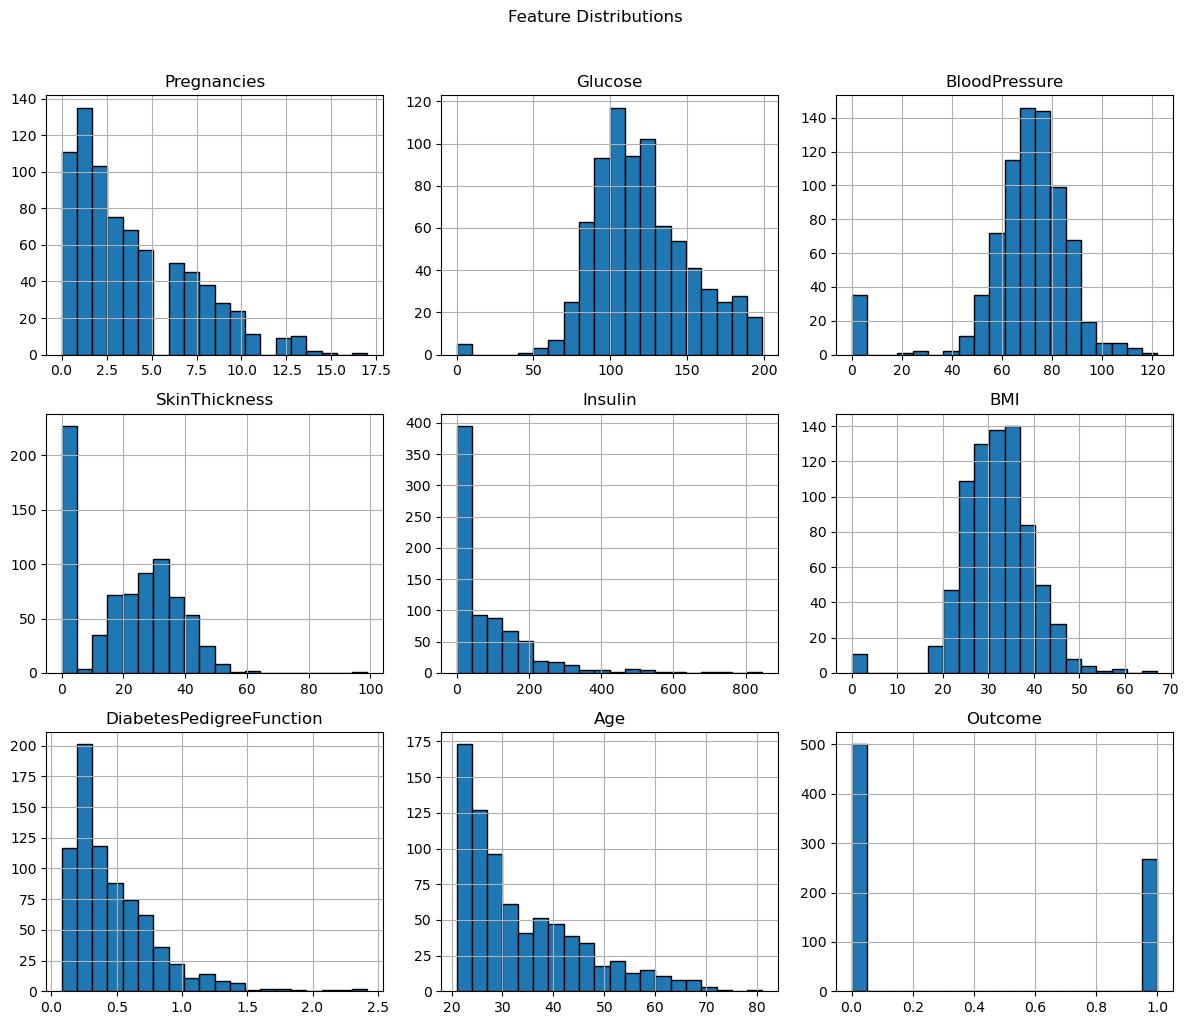

In [15]:
#Plot histogram distributions of all features
df.hist(figsize=(12,10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout(); plt.show()

In [16]:
#Rename column for easier reference (shorten DiabetesPedigreeFunction → DPF)
df = df.rename(columns={'DiabetesPedigreeFunction': 'DPF'})

#Generate descriptive statistics (count, mean, std, min, max, quartiles)
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
#Compare mean and median values of selected features grouped by Outcome
df.groupby(['Outcome']).agg({"Age":["mean", "median"],
                            "Glucose":["mean","median"],
                            "Pregnancies":["mean", "median"],
                            "BMI":["mean", "median"],
                            "SkinThickness":["mean", "median"]})

Age            Glucose        Pregnancies               BMI  \
              mean median        mean median        mean median       mean   
Outcome                                                                      
0        31.190000   27.0  109.980000  107.0    3.298000    2.0  30.304200   
1        37.067164   36.0  141.257463  140.0    4.865672    4.0  35.142537   

               SkinThickness         
        median          mean median  
Outcome                              
0        30.05     19.664000   21.0  
1        34.25     22.164179   27.0

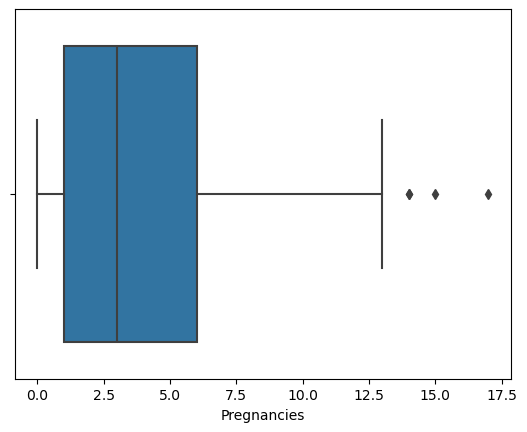

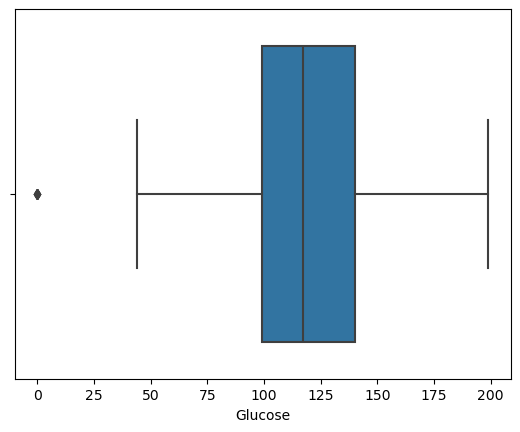

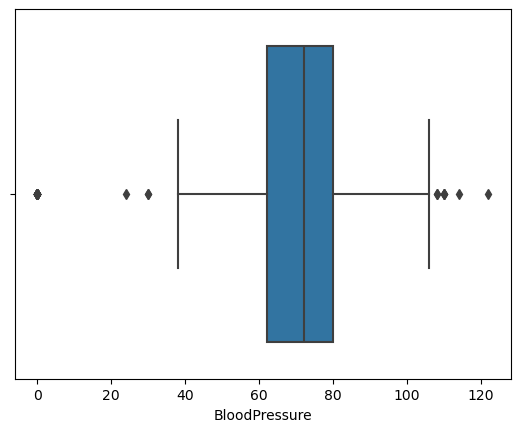

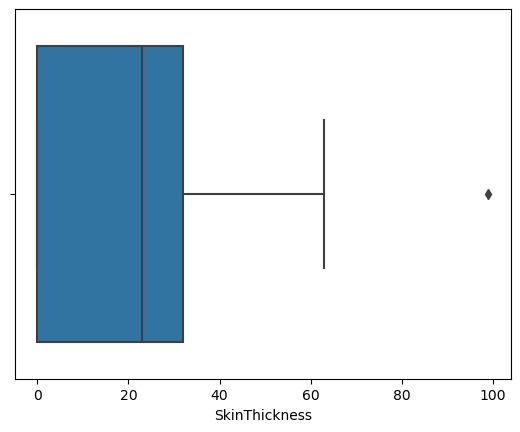

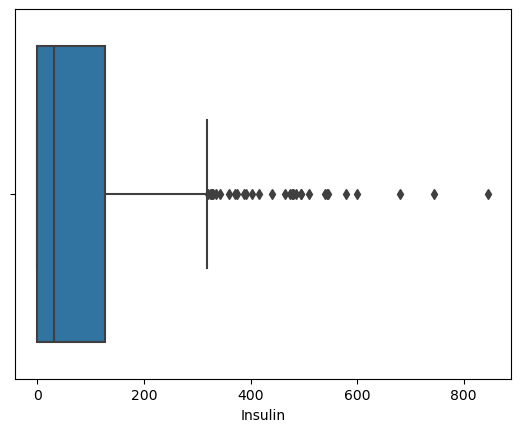

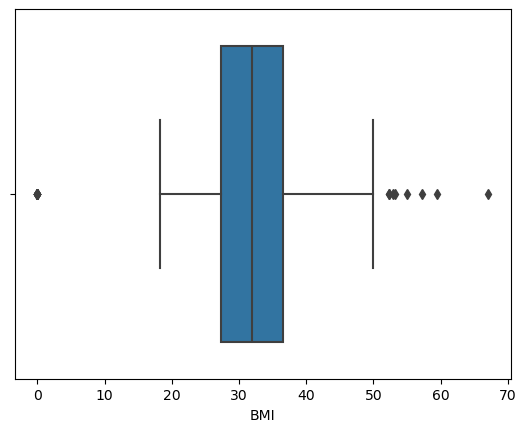

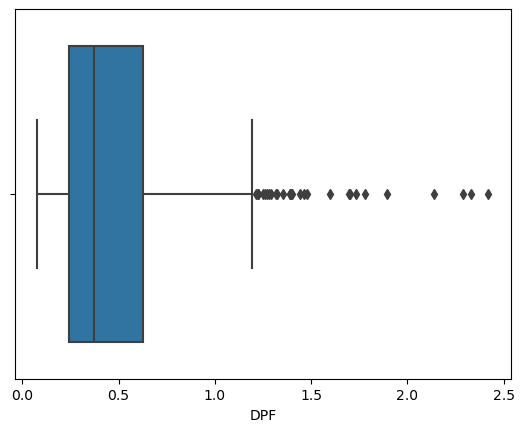

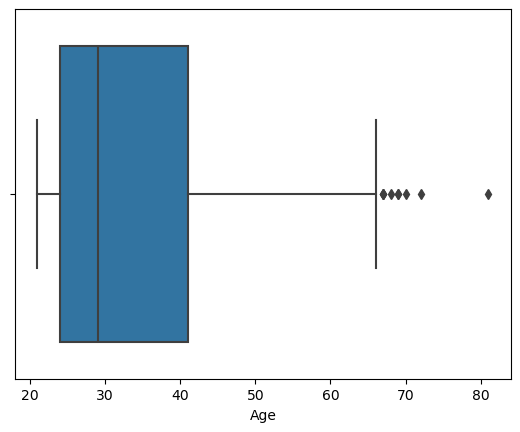

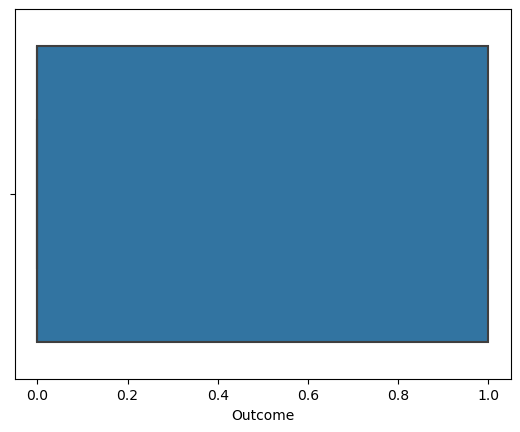

In [18]:
#Checking for outliers using boxplots for each numeric feature
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data = df, x = i)
    plt.show()

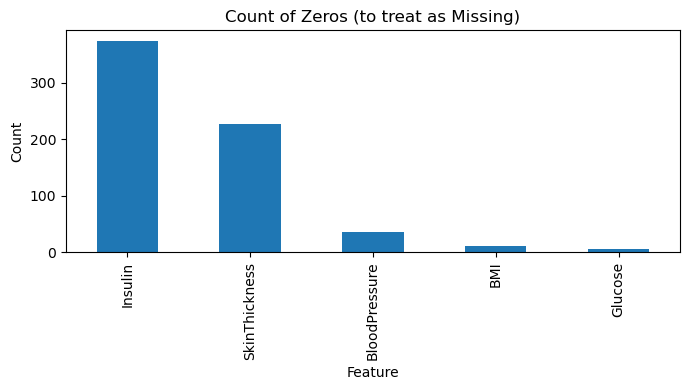

In [19]:
# Count zero values in key medical features (to treat as missing later)
zero_as_missing = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
zero_counts = (df[zero_as_missing] == 0).sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(7,4))
zero_counts.plot(kind="bar", ax=ax)
ax.set_title("Count of Zeros (to treat as Missing)")
ax.set_ylabel("Count"); ax.set_xlabel("Feature")
plt.tight_layout(); plt.show()


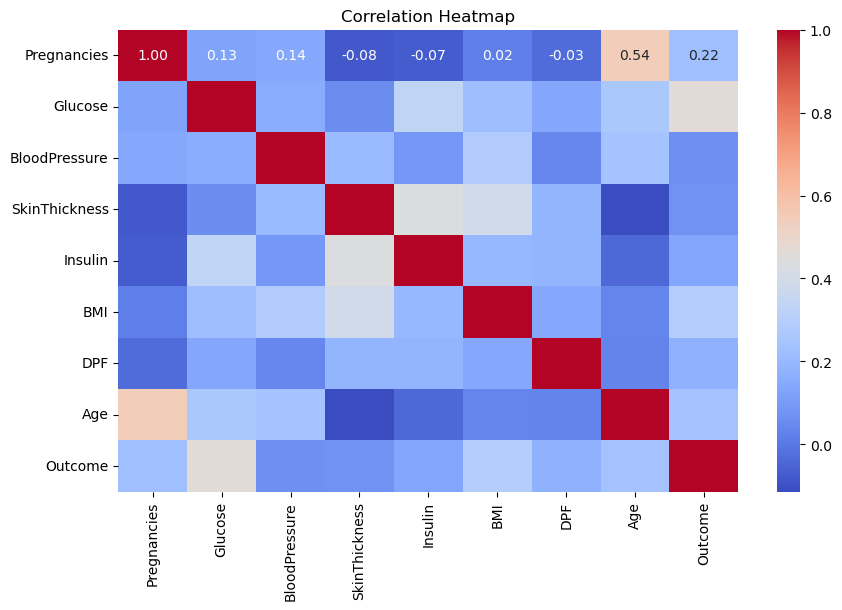

In [20]:
# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


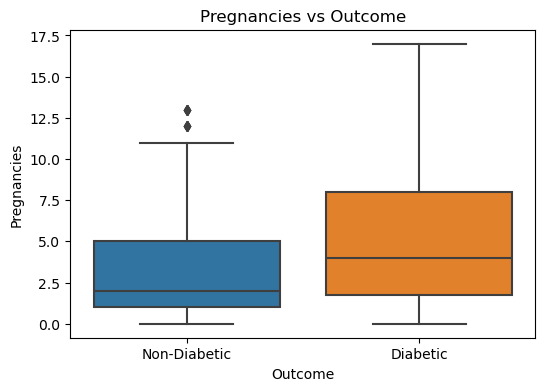

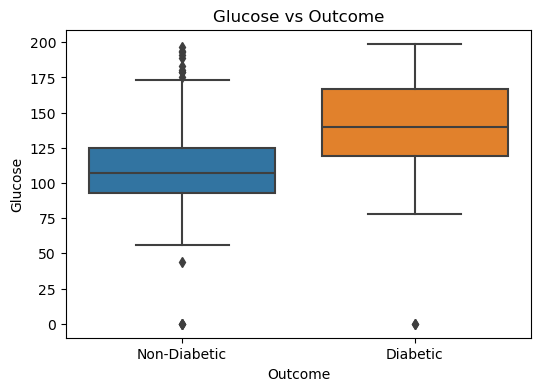

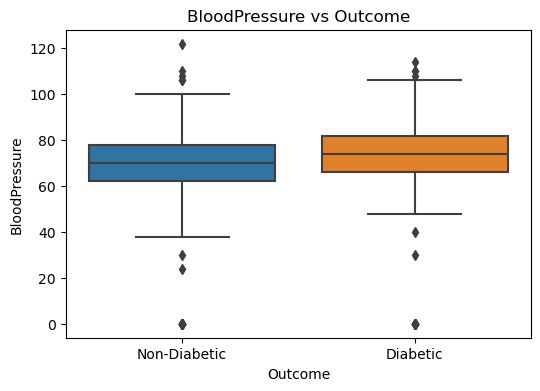

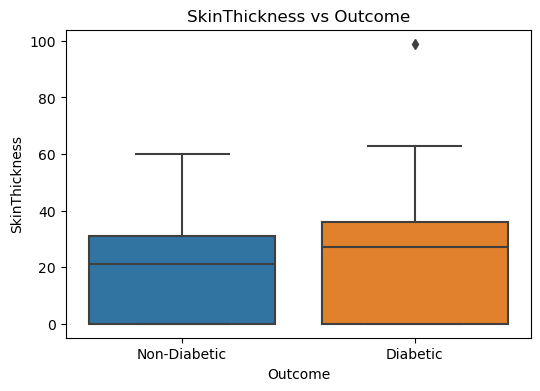

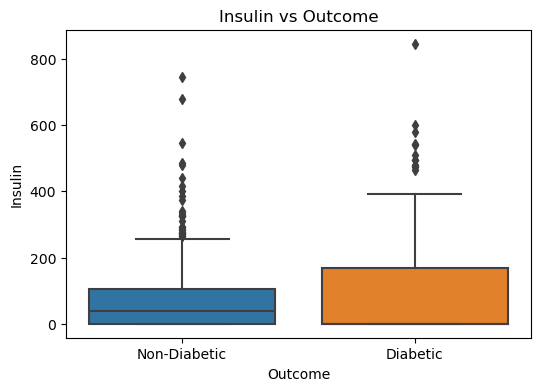

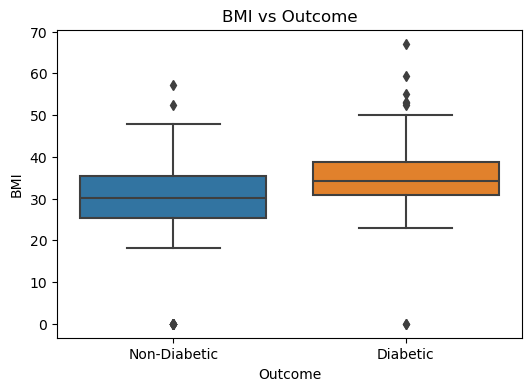

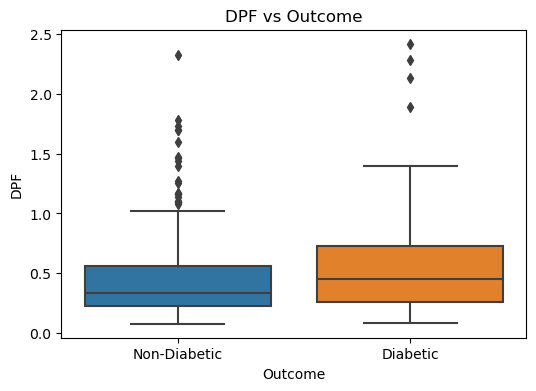

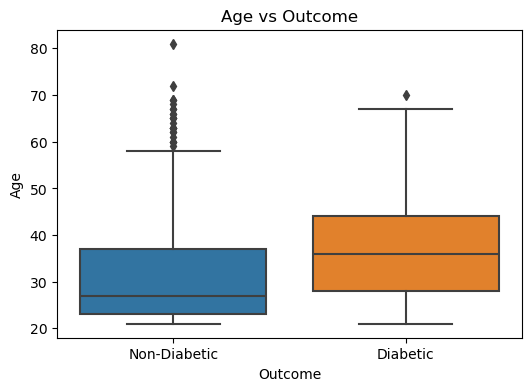

In [21]:
# Boxplots of each predictor feature against the Outcome variable
features = df.columns[:-1]  # all except Outcome
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} vs Outcome")
    plt.xticks([0,1], ["Non-Diabetic", "Diabetic"])
    plt.show()


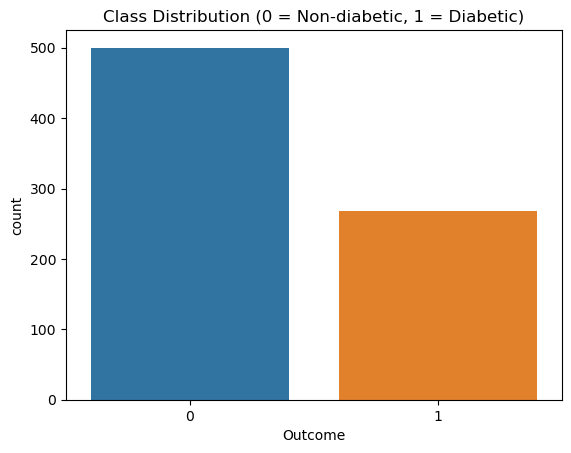

In [22]:
# Count plot of the Outcome variable (class distribution)
sns.countplot(x="Outcome", data=df)
plt.title("Class Distribution (0 = Non-diabetic, 1 = Diabetic)")
plt.show()


### Summarisation for 2.2 Data Exploration and Visualization
From the dataset overview, we can observe that:
<ul>
  <li>Most features show <b>skewed distributions</b> and contain <b>outliers</b> (especially Insulin and SkinThickness).</li>
  <li>Several medical attributes (<b>Insulin, SkinThickness, BloodPressure, BMI, Glucose</b>) contain <b>zero values</b>, which are not realistic and must be handled in preprocessing.  >
    li<li><b>Diabetic patients</b> generally have higher <b>Glucose</b> and <b>BMI</b>, and are also <b>older on average</b> compared to non-diabetic patients.<l
i>
  <li>The <b>correlation heatmap</b> shows that <b>Glucose</b> has the strongest positive correlation with the <b>Outcome</b>, followed by <b>BMI</b> and <b>Age</b>. Other features show weaker correlations.</li>
  <li>The dataset is <b>class imbalanced</b>, with 500 non-diabetic and 268 diabetic cases, which must be considered during model training.</li>
</ul>



# 2.3 Data Preprocessing

### Handling Missing / Zero Values

In [23]:
correlations = df.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome          1.000000
Glucose          0.466581
BMI              0.292695
Age              0.238356
Pregnancies      0.221898
DPF              0.173844
Insulin          0.130548
SkinThickness    0.074752
BloodPressure    0.065068
Name: Outcome, dtype: float64

In [24]:
df[['Glucose', 'BMI']] = df[['Glucose', 'BMI']].replace(0, np.NaN)
df.dropna(inplace=True)

In [25]:
# Step 1: Replace zeros with NaN
cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Use .copy() to create an independent copy of the data.
# This avoids unintended modifications to the original dataframe (df)
# and prevents SettingWithCopyWarning when making changes to X or y.
X = df.drop("Outcome", axis=1).copy()
y = df["Outcome"].copy()

# Before replacing zeros, check how many zeros exist before replacement
print("Zero counts before replacement:")
print(X[cols_with_missing].eq(0).sum())

# Replace 0 values with NaN (so it can be imputed later)
X[cols_with_missing] = X[cols_with_missing].replace(0, np.nan)

# Confirm replacement worked (NaN counts)
print("\nNaN counts after replacement:")
print(X[cols_with_missing].isna().sum())
nan_counts = X[cols_with_missing].isna().sum()


Zero counts before replacement:
Glucose            0
BloodPressure     28
SkinThickness    218
Insulin          360
BMI                0
dtype: int64

NaN counts after replacement:
Glucose            0
BloodPressure     28
SkinThickness    218
Insulin          360
BMI                0
dtype: int64


In [26]:
# Step 2: Train_test split , do this AFTER replacing zeros to avoid data leakage.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
# Step 3: Impute missing values with median
# fit the imputer ONLY for the training data,
# then apply the same transformation to test data
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)  # fit on train
X_test_imp  = imputer.transform(X_test)       # apply same medians to test (no need to use fit_transform for test set here)


In [28]:
# Save the medians learned from training (useful for reporting and later deployment)
medians = pd.Series(imputer.statistics_, index=X_train.columns)

# Convert back to DataFrames for readability
X_train_imp_df = pd.DataFrame(X_train_imp, columns=X_train.columns)
X_test_imp_df = pd.DataFrame(X_test_imp, columns=X_test.columns)

# Verify no missing values remain after imputation
print("\nNaN counts in training set after imputation:")
print(X_train_imp_df.isna().sum())

print("\nNaN counts in test set after imputation:")
print(X_test_imp_df.isna().sum())


NaN counts in training set after imputation:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
dtype: int64

NaN counts in test set after imputation:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
dtype: int64


In [29]:
# Combine into a single report
report = pd.DataFrame({
    "zeros_before": zero_counts,
    "NaNs_after_replacement": nan_counts,
    "median_used_for_imputation": medians[cols_with_missing]
})

# Reset index for clarity
report = report.reset_index().rename(columns={"index": "Feature"})

# Round numeric values
report = report.round(1)

# Pretty print with tabulate
print("Diagnostics Report:")
print(tabulate(report, headers="keys", tablefmt="pretty"))


Diagnostics Report:
+---+---------------+--------------+------------------------+----------------------------+
|   |    Feature    | zeros_before | NaNs_after_replacement | median_used_for_imputation |
+---+---------------+--------------+------------------------+----------------------------+
| 0 |      BMI      |      11      |           0            |            32.7            |
| 1 | BloodPressure |      35      |           28           |            72.0            |
| 2 |    Glucose    |      5       |           0            |           119.0            |
| 3 |    Insulin    |     374      |          360           |           130.0            |
| 4 | SkinThickness |     227      |          218           |            30.0            |
+---+---------------+--------------+------------------------+----------------------------+


### Summarisation for 2.3 Data Preprocessing
For the data preprocessing, what we do is that:
<ul>
  <li>Replaced biologically implausible <b>zero values</b> in medical features 
      (<b>Glucose, BloodPressure, SkinThickness, Insulin, BMI</b>) with <b>NaN</b> 
      to treat them as missing data.</li>
  <li>Performed a <b>train-test split</b> (80/20) after zero replacement, with <b>stratify</b> 
      to preserve the class ratio.</li>
  <li>Applied <b>median imputation</b> on missing values using the <b>training set only</b>, 
      and applied the same medians to the test set to avoid <b>data leakage</b>.</li>
  <li>Verified that <b>no missing values</b> remained after imputation.</li>
  <li>The <b>diagnostics report</b> confirmed that zeros in <b>BMI (11), BloodPressure (35), 
      Glucose (5), Insulin (374), and SkinThickness (227)</b> were successfully replaced and 
      imputed with their respective median values.</li>
</ul>


# 3.0 Training The Model
<div id="model-suitability">
  <h3>Model Suitability</h3>
  <p><strong>3.1 Logistic Regression (LR):</strong> Suits binary diabetes prediction by assuming a linear relationship between risk factors (e.g., glucose, BMI) and the <em>log-odds</em> of the outcome. This matches the <strong>linear‑separable</strong> intuition and remains highly interpretable.</p>
  <p><strong>3.2 Random Forest (RF):</strong> An ensemble of decision trees that captures <strong>non‑linear interactions</strong> and feature dependencies. It’s generally <strong>robust to outliers</strong> and measurement noise, and works well with mixed‑scale features.</p>
  <p><strong>3.3 SVM (RBF kernel):</strong> Models <strong>complex, non‑linear boundaries</strong> via the RBF kernel, enabling separation when classes aren’t linearly separable. Performance is sensitive to <strong>feature scaling</strong> and hyperparameters <strong>C</strong> and <strong>&gamma;</strong>. It requires careful tuning to avoid under/overfitting.</p>
</div>


# 3.1 Logistic Regression 

In [30]:
# --- Step 1: Scale features ---
# Logistic Regression benefits from standardized features.
# Fit scaler only on training data, then apply same transformation to test data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

In [31]:
# --- Step 2: Initialize Logistic Regression model ---
# class_weight="balanced" ensures the model gives fair attention to both classes
# max_iter=1000 ensures convergence
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)


In [32]:
# --- Step 3: Helper function to extract prediction scores ---
# Prefer predict_proba if available; otherwise decision_function (scaled);
# fallback is raw predicted labels if nothing else is available.

## This helper funciton can be used for Logistic Regression (lR) Model, Random Forest (RF) Model, and Support Vector Machine (SVM) Model
def _get_scores(estimator, X):
    """
    Return a continuous score per sample for binary classification.
    Used for plotting ROC/PR curves.
    """
    if hasattr(estimator, "predict_proba"):
        return estimator.predict_proba(X)[:, 1]
    if hasattr(estimator, "decision_function"):
        dec = estimator.decision_function(X).reshape(-1, 1)
        return MinMaxScaler().fit_transform(dec).ravel()
    return estimator.predict(X).astype(float)

# --- Step 4: Evaluation function for binary classifiers ---
# Calculates Accuracy, Precision, Recall, F1, Classification Report,
# Confusion Matrix, Precision-Recall curve, Average Precision (AP),
# ROC-AUC, and ROC curve. Plots are generated if show_plots=True.
def evaluate_binary_classifier(
    estimator, X, y, set_name="TEST",
    target_names=("No Diabetes (0)", "Diabetes (1)"),
    show_plots=True
):
    """
    Standard evaluation for binary classifiers.

    Prints (in order):
      1) Accuracy
      2) Precision
      3) Recall
      4) F1
      5) Classification report
      6) Confusion Matrix (and plot if show_plots=True)
      7) Average Precision (AP) + Precision–Recall curve (PLOT FIRST as requested)
      8) ROC-AUC
      9) ROC curve (plot)

    Returns a dict of key metrics and the confusion matrix.
    """
    # Predictions & continuous scores
    y_pred = estimator.predict(X)
    y_score = _get_scores(estimator, X)

    # Core metrics
    acc  = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec  = recall_score(y, y_pred)
    f1   = f1_score(y, y_pred)
    rep  = classification_report(y, y_pred, target_names=list(target_names))

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Precision–Recall Curve + Average Precision
    precisions, recalls, _ = precision_recall_curve(y, y_score)
    ap = average_precision_score(y, y_score)

    # ROC-AUC + ROC Curve
    try:
        roc_auc = roc_auc_score(y, y_score)
        fpr, tpr, _ = roc_curve(y, y_score)
    except Exception:
        roc_auc, fpr, tpr = np.nan, None, None

    # === Prints Metrics===
    print(f"=== {set_name} SET ===")
    print(f"1) Accuracy : {acc}")
    print(f"2) Precision: {prec}")
    print(f"3) Recall   : {rec}")
    print(f"4) F1 Score : {f1}")
    print("5) Classification report:\n", rep)

    # Confusion Matrix
    print("6) Confusion Matrix:")
    if show_plots:
        fig, ax = plt.subplots(figsize=(5, 5))
        ConfusionMatrixDisplay(cm, display_labels=["No (0)", "Yes (1)"]).plot(
            ax=ax, cmap=plt.cm.Blues, values_format='d'
        )
        ax.set_title(f"Confusion Matrix — {set_name}")
        plt.tight_layout()
        plt.show()
    else:
        print(cm)

    # Precision–Recall Curve
    print(f"7) Average Precision (AP): {ap}")
    if show_plots:
        plt.figure(figsize=(6, 6))
        plt.plot(recalls, precisions, label=f"AP = {ap:.3f}")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Precision–Recall Curve — {set_name}")
        plt.legend(loc="lower left")
        plt.tight_layout()
        plt.show()

    # ROC curve
    print(f"8) ROC-AUC : {roc_auc}")
    if show_plots and fpr is not None:
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve — {set_name}")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    return {
        "accuracy": acc, "precision": prec, "recall": rec, "f1": f1,
        "ap": ap, "roc_auc": roc_auc, "cm": cm
    }

# --- Step 5: Training & reporting function ---
# Fits model once on TRAIN, evaluates both TRAIN and TEST,
# and plots combined ROC curve (Train vs Test).
def train_and_report(estimator, X_train, y_train, X_test, y_test,
                     target_names=("No Diabetes (0)", "Diabetes (1)"),
                     show_plots=True, model_name=None):
    """
    NORMAL TRAINING (before GridSearch):
      - Fits estimator on X_train, y_train
      - Prints & plots TRAIN results (PR first, then ROC)
      - Prints & plots TEST results (PR first, then ROC)
      - Plots a combined ROC Curve (Train vs Test)
    Returns a dict with train/test metrics.
    """
    if model_name:
        print(f"\n===== {model_name}: Fit on TRAIN, then evaluate =====\n")

    # Fit once on TRAIN
    estimator.fit(X_train, y_train)

     # Evaluate TRAIN set
    metrics_train = evaluate_binary_classifier(estimator, X_train, y_train, set_name="TRAIN",
                                target_names=target_names, show_plots=show_plots)

    # Evaluate TEST set
    metrics_test  = evaluate_binary_classifier(estimator, X_test,  y_test,  set_name="TEST",
                                target_names=target_names, show_plots=show_plots)

    # Plot combined ROC (Train vs Test)
    if show_plots:
        # TRAIN scores and ROC
        y_score_tr = _get_scores(estimator, X_train)
        try:
            from sklearn.metrics import roc_auc_score, roc_curve
            auc_tr = roc_auc_score(y_train, y_score_tr)
            fpr_tr, tpr_tr, _ = roc_curve(y_train, y_score_tr)
        except Exception:
            auc_tr, fpr_tr, tpr_tr = np.nan, None, None

        # TEST scores and ROC
        y_score_te = _get_scores(estimator, X_test)
        try:
            auc_te = roc_auc_score(y_test, y_score_te)
            fpr_te, tpr_te, _ = roc_curve(y_test, y_score_te)
        except Exception:
            auc_te, fpr_te, tpr_te = np.nan, None, None

        if (fpr_tr is not None) and (fpr_te is not None):
            plt.figure(figsize=(6, 6))
            plt.plot(fpr_tr, tpr_tr, label=f"Train ROC (AUC = {auc_tr:.3f})")
            plt.plot(fpr_te, tpr_te, label=f"Test  ROC (AUC = {auc_te:.3f})")
            plt.plot([0, 1], [0, 1], linestyle="--")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve — Train vs Test")
            plt.legend(loc="lower right")
            plt.tight_layout()
            plt.show()

    return {"train": metrics_train, "test": metrics_test}



===== Logistic Regression: Fit on TRAIN, then evaluate =====

=== TRAIN SET ===
1) Accuracy : 0.7670549084858569
2) Precision: 0.6497890295358649
3) Recall   : 0.7298578199052133
4) F1 Score : 0.6875
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.84      0.79      0.81       390
   Diabetes (1)       0.65      0.73      0.69       211

       accuracy                           0.77       601
      macro avg       0.75      0.76      0.75       601
   weighted avg       0.78      0.77      0.77       601

6) Confusion Matrix:


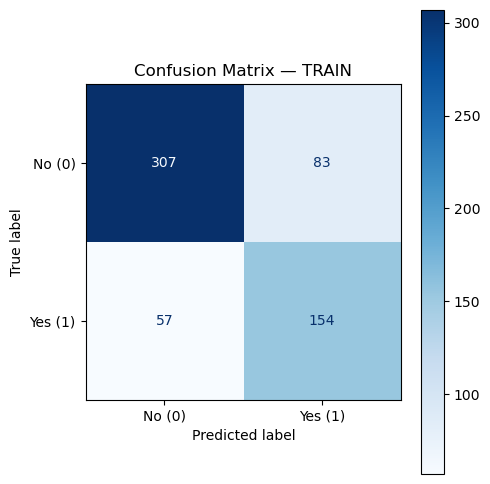

7) Average Precision (AP): 0.7189085483148325


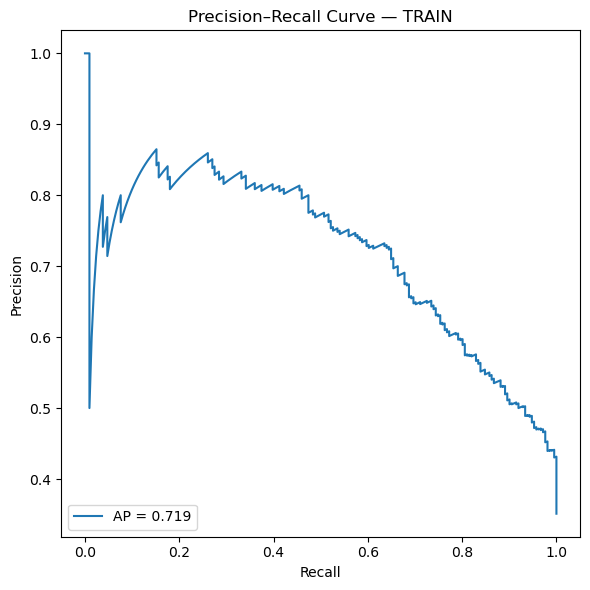

8) ROC-AUC : 0.8411836189087374


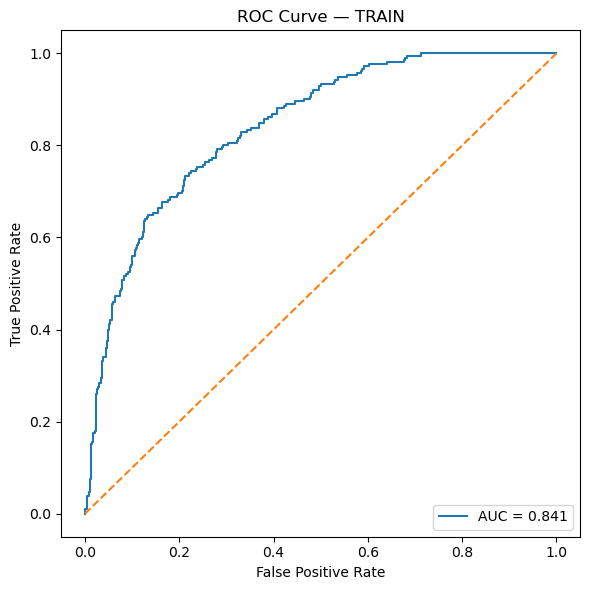

=== TEST SET ===
1) Accuracy : 0.7615894039735099
2) Precision: 0.6888888888888889
3) Recall   : 0.5849056603773585
4) F1 Score : 0.6326530612244898
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.79      0.86      0.82        98
   Diabetes (1)       0.69      0.58      0.63        53

       accuracy                           0.76       151
      macro avg       0.74      0.72      0.73       151
   weighted avg       0.76      0.76      0.76       151

6) Confusion Matrix:


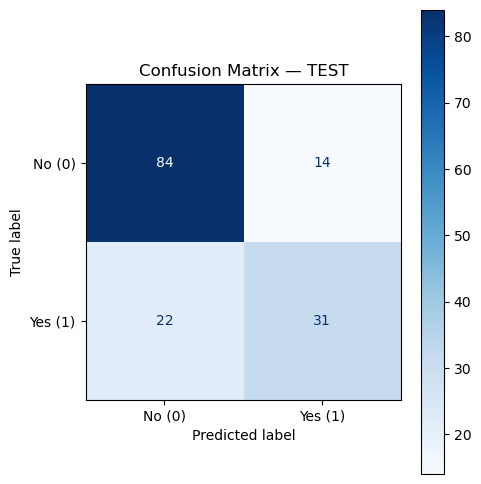

7) Average Precision (AP): 0.764910059251888


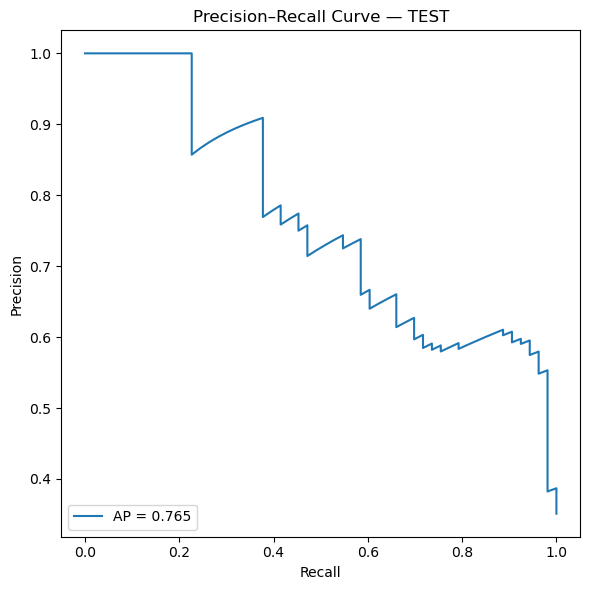

8) ROC-AUC : 0.8507893723527147


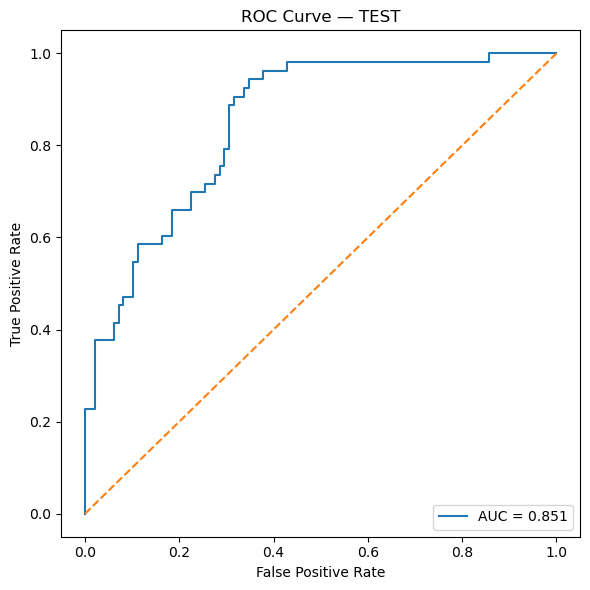

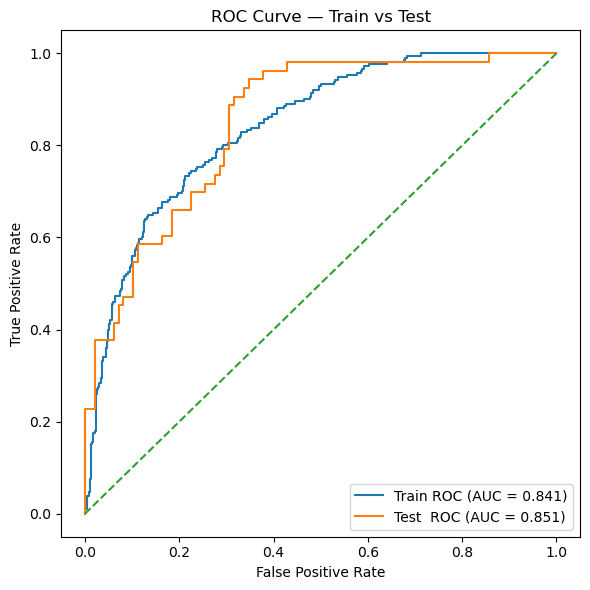

{'train': {'accuracy': 0.7670549084858569,
  'precision': 0.6497890295358649,
  'recall': 0.7298578199052133,
  'f1': 0.6875,
  'ap': 0.7189085483148325,
  'roc_auc': 0.8411836189087374,
  'cm': array([[307,  83],
         [ 57, 154]], dtype=int64)},
 'test': {'accuracy': 0.7615894039735099,
  'precision': 0.6888888888888889,
  'recall': 0.5849056603773585,
  'f1': 0.6326530612244898,
  'ap': 0.764910059251888,
  'roc_auc': 0.8507893723527147,
  'cm': array([[84, 14],
         [22, 31]], dtype=int64)}}

In [33]:
# --- Step 6: Train Logistic Regression and report results ---
train_and_report(log_reg, X_train_scaled, y_train, X_test_scaled, y_test, model_name="Logistic Regression")

### -- Summarisation --
<ul>
  <li>Applied <b>StandardScaler</b> to normalize features before training.</li>
  <li>Trained a <b>Logistic Regression</b> model with <b>class_weight="balanced"</b> to address class imbalance.</li>
  <li>Evaluated the model on both <b>training</b> and <b>test sets</b> using <b>accuracy, precision, recall, F1-score, ROC-AUC,</b> and <b>confusion matrix</b>.</li>
  <li>Plotted <b>Precision–Recall curves</b> and <b>ROC curves</b> for a visual performance comparison.</li>
  <li>Generated a <b>combined ROC curve</b> to compare <b>train vs test performance</b> and assess generalization.</li>
</ul>


# 3.1.1 Logistic Regression – K-Fold Cross-Validation
<p>K-Fold Cross-Validation is important to:</p>
<ul>
  <li><b>Reduces bias:</b> Instead of relying on a single train-test split, the model is trained and tested across multiple folds, giving a fairer and more reliable evaluation.</li>
  <li><b>Handles class imbalance:</b> Using <code>StratifiedKFold</code> ensures that the proportion of diabetic vs. non-diabetic cases is preserved in each fold.</li>
  <li><b>Provides stable performance metrics:</b> Accuracy, Precision, Recall, F1-score, and ROC-AUC are calculated for each fold, then averaged to give a more consistent estimate of model performance.</li>
  <li><b>Checks model robustness:</b> If the scores are consistent across folds, it shows the model generalizes well. Large variation may indicate overfitting or instability.</li>
  <li><b>Ensures fairness in evaluation:</b> Every data point is used both for training and testing, making the assessment more comprehensive.</li>
</ul>


In [34]:
# Full pipeline: imputation -> scaling -> logistic regression (with class weights for imbalance)
pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), # fit median on CV train fold only
    ("scaler", StandardScaler()),    # fit scaler on CV train fold only
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# 5-fold stratified CV (shuffle for stability)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate multiple metrics on TRAIN SPLIT ONLY (X_train, y_train)
scores_acc  = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy")
scores_prec = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="precision")
scores_rec  = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="recall")
scores_f1   = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="f1")
scores_auc  = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="roc_auc")

print("=== 5-Fold Cross Validation on Training Set ===")
print("1. Accuracy scores :", scores_acc, " | Mean:", scores_acc.mean())
print("2. Precision scores:", scores_prec, " | Mean:", scores_prec.mean())
print("3. Recall scores   :", scores_rec, " | Mean:", scores_rec.mean())
print("4. F1 scores       :", scores_f1, " | Mean:", scores_f1.mean())
print("5. ROC-AUC scores  :", scores_auc, " | Mean:", scores_auc.mean())

=== 5-Fold Cross Validation on Training Set ===
1. Accuracy scores : [0.65289256 0.75833333 0.7        0.83333333 0.80833333]  | Mean: 0.7505785123966943
2. Precision scores: [0.50980392 0.63829787 0.54545455 0.78947368 0.72093023]  | Mean: 0.6407920512264529
3. Recall scores   : [0.60465116 0.71428571 0.85714286 0.71428571 0.73809524]  | Mean: 0.7256921373200443
4. F1 scores       : [0.55319149 0.6741573  0.66666667 0.75       0.72941176]  | Mean: 0.6746854448210076
5. ROC-AUC scores  : [0.7653548  0.84554335 0.81349206 0.88492063 0.85805861]  | Mean: 0.8334738904506347


# 3.1.2 Logistic Regression – Fine-tuning (Hyperparameter-tuning)
<p>It is to:</p>
<ul>
  <li><b>Improves performance:</b> Logistic Regression has important hyperparameters such as the regularization strength (<code>C</code>), penalty type (<code>l1</code> or <code>l2</code>), and solver. Tuning these can significantly improve accuracy, precision, recall, and other metrics.</li>
  <li><b>Controls overfitting vs. underfitting:</b> The <code>C</code> parameter controls the trade-off between bias and variance. A poor choice may lead to either overfitting (too complex) or underfitting (too simple).</li>
  <li><b>Ensures fairness across metrics:</b> Instead of relying only on default settings, fine-tuning helps balance metrics like recall and precision — which is especially important in imbalanced datasets such as diabetes prediction.</li>
  <li><b>Finds the best configuration:</b> Hyperparameter tuning (e.g., <code>GridSearchCV</code> or <code>RandomizedSearchCV</code>) systematically searches different parameter combinations to identify the model that generalizes best to unseen data.</li>
  <li><b>Increases robustness:</b> A tuned model is less sensitive to random data splits, giving more reliable and stable performance across different folds.</li>
</ul>


In [35]:
# Hyperparameter grid to explore
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],          # regularization strength
    "clf__penalty": ["l1", "l2"],               # type of regularization type
    "clf__solver": ["liblinear", "saga"]        # solvers that support l1 & l2
}

# GridSearchCV with 5-fold cross-validation
# Scoring = ROC-AUC because the dataset is imbalanced (better than accuracy)
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid.fit(X_train, y_train)

# Print best parameters & best cross-validated ROC-AUC
print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)

# Final evaluation on test set using the best estimator
best_lr  = grid.best_estimator_
y_test_pred = best_lr.predict(X_test)
y_test_prob = best_lr.predict_proba(X_test)[:, 1]



Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best CV ROC-AUC: 0.8337933384445014


=== TRAIN - Best Logistic Regression Model SET ===
1) Accuracy : 0.762063227953411
2) Precision: 0.640495867768595
3) Recall   : 0.7345971563981043
4) F1 Score : 0.684326710816777
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.84      0.78      0.81       390
   Diabetes (1)       0.64      0.73      0.68       211

       accuracy                           0.76       601
      macro avg       0.74      0.76      0.75       601
   weighted avg       0.77      0.76      0.77       601

6) Confusion Matrix:


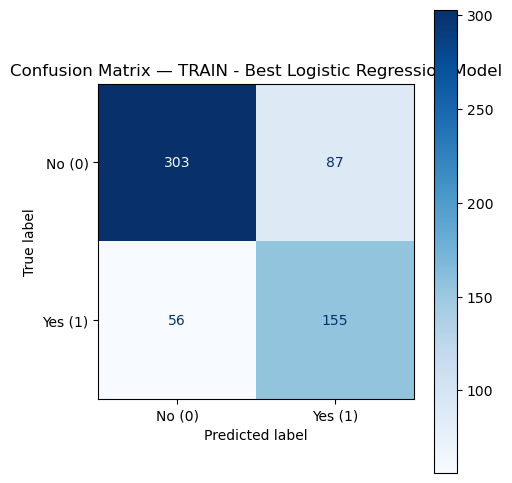

7) Average Precision (AP): 0.7154585749169756


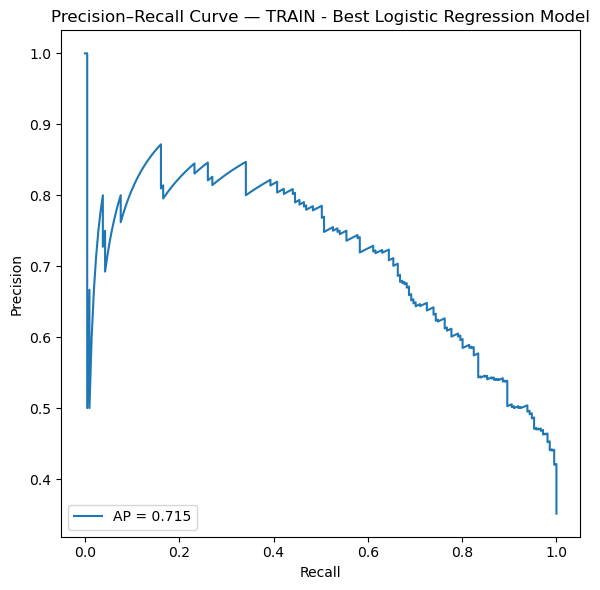

8) ROC-AUC : 0.8407704459837161


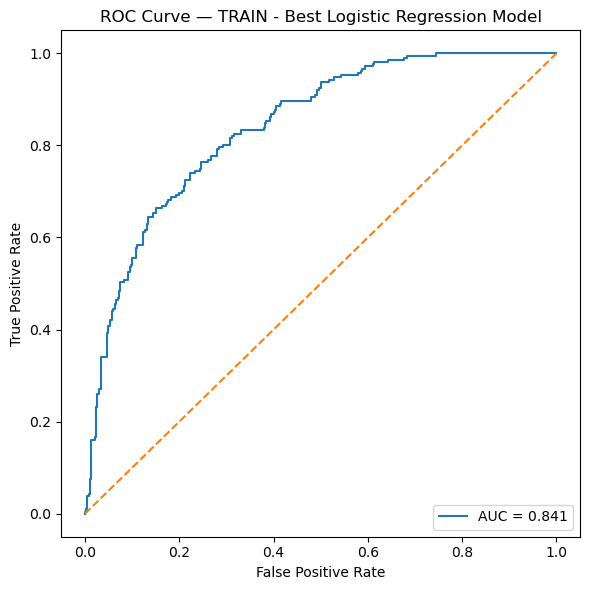

{'accuracy': 0.762063227953411,
 'precision': 0.640495867768595,
 'recall': 0.7345971563981043,
 'f1': 0.684326710816777,
 'ap': 0.7154585749169756,
 'roc_auc': 0.8407704459837161,
 'cm': array([[303,  87],
        [ 56, 155]], dtype=int64)}

In [36]:
# Evaluate tuned model on TRAIN sets
evaluate_binary_classifier(best_lr,  X_train , y_train, set_name="TRAIN - Best Logistic Regression Model")

=== TEST SET ===
1) Accuracy : 0.7549668874172185
2) Precision: 0.6666666666666666
3) Recall   : 0.6037735849056604
4) F1 Score : 0.6336633663366337
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.80      0.84      0.82        98
   Diabetes (1)       0.67      0.60      0.63        53

       accuracy                           0.75       151
      macro avg       0.73      0.72      0.72       151
   weighted avg       0.75      0.75      0.75       151

6) Confusion Matrix:


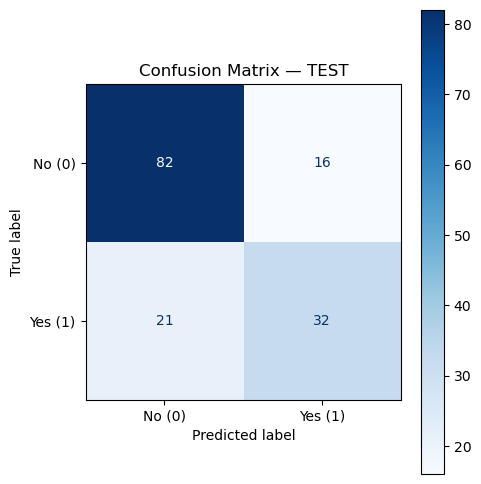

7) Average Precision (AP): 0.7630912842757527


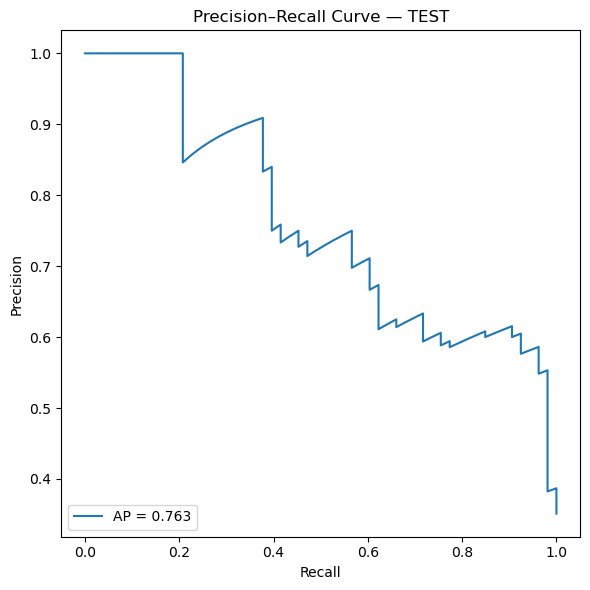

8) ROC-AUC : 0.8517520215633424


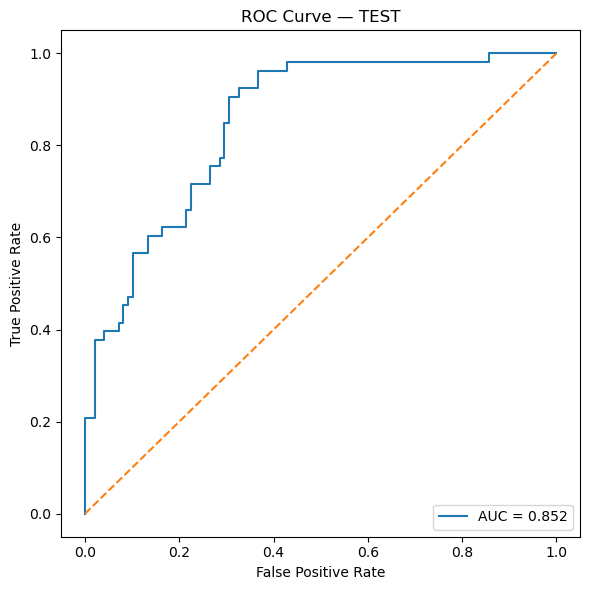

{'accuracy': 0.7549668874172185,
 'precision': 0.6666666666666666,
 'recall': 0.6037735849056604,
 'f1': 0.6336633663366337,
 'ap': 0.7630912842757527,
 'roc_auc': 0.8517520215633424,
 'cm': array([[82, 16],
        [21, 32]], dtype=int64)}

In [37]:
# Evaluate tuned model on TEST sets
evaluate_binary_classifier(best_lr,  X_test, y_test, set_name="TEST")

### Summarisation for Logistic Regression Model
<ul>
  <li><b>3.1 Baseline Training:</b> Trained a Logistic Regression model with <b>StandardScaler</b> and <b>class_weight="balanced"</b> to handle class imbalance. 
      On the <b>test set</b>, the model achieved <b>Accuracy = 76.2%</b>, <b>Precision = 68.9%</b>, <b>Recall = 58.5%</b>, <b>F1 = 63.3%</b>, and <b>ROC-AUC = 0.851</b>. 
      This shows that the model is reasonably good at identifying diabetic patients, with a stronger recall than precision.</li>
      
  <li><b>3.1.1 Cross-Validation:</b> Applied <b>5-fold Stratified Cross-Validation</b> on the training set with a full preprocessing pipeline 
      (imputation → scaling → Logistic Regression). The average results across folds were 
      <b>Accuracy = 75.1%</b>, <b>Precision = 64.1%</b>, <b>Recall = 72.6%</b>, <b>F1 = 67.5%</b>, and <b>ROC-AUC = 0.833</b>. 
      These results were consistent across folds, indicating <b>stable model performance and good generalization</b>.</li>
      
  <li><b>3.1.2 Hyperparameter Tuning:</b> Used <b>GridSearchCV</b> with 5-fold CV to optimize hyperparameters (<b>C, penalty, solver</b>) using <b>ROC-AUC</b>. 
      The best model was <b>C = 0.1</b>, <b>penalty = l2</b>, <b>solver = liblinear</b>, achieving a <b>CV ROC-AUC = 0.834</b>. 
      On the <b>test set</b>, the tuned model reached <b>Accuracy = 75.5%</b>, <b>Precision = 66.7%</b>, <b>Recall = 60.4%</b>, 
      <b>F1 = 63.4%</b>, and <b>ROC-AUC = 0.852</b>. 
      Performance was similar to the baseline, showing that the initial model was already well-calibrated, but tuning confirmed robustness.</li>
</ul>


# 3.2 Random Forest Model 
<p>
We chose the <b>Random Forest model</b> to compare with Logistic Regression because it is a 
<strong>powerful ensemble method</strong> that works well with both small and large datasets. 
Unlike Logistic Regression, which assumes a linear relationship, Random Forest can handle 
<strong>non-linear patterns</strong> in the data. 
</p>

<p>
It is also less sensitive to outliers and can automatically handle <strong>feature importance</strong>, 
which helps in understanding which variables are most influential. 
By comparing Random Forest with Logistic Regression, We can evaluate whether a simple 
linear model is enough, or if a more complex ensemble model gives better performance.
</p>

In [38]:
# --- Pipeline: Imputer + Random Forest ---

# Create a pipeline that handles missing values and trains a Random Forest model
rf_pipe = Pipeline(steps=[
    # Step 1: Replace missing values in the dataset using the median of each column
    ("imputer", SimpleImputer(strategy="median")),
    # Step 2: Random Forest Classifier
    ("rf", RandomForestClassifier(
        n_estimators=100, # Number of trees in the forest
        max_depth=None, # Allow trees to expand until all leaves are pure
        class_weight="balanced", # Handle class imbalance by adjusting weights
        random_state=42 # Ensure reproducibility of results
    ))
])

# No need to manually fit_transform X_train or scale it beforehand,
# because the pipeline will automatically handle preprocessing (imputation)
# inside when we call fit(). In Addtion, Random Forest is a tree-based model, 
# so it does not require standardized/scaled data.
# This is the reason why we directly use X_train instead of X_train_scaled here.


===== Random Forest: Fit on TRAIN, then evaluate =====

=== TRAIN SET ===
1) Accuracy : 1.0
2) Precision: 1.0
3) Recall   : 1.0
4) F1 Score : 1.0
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       1.00      1.00      1.00       390
   Diabetes (1)       1.00      1.00      1.00       211

       accuracy                           1.00       601
      macro avg       1.00      1.00      1.00       601
   weighted avg       1.00      1.00      1.00       601

6) Confusion Matrix:


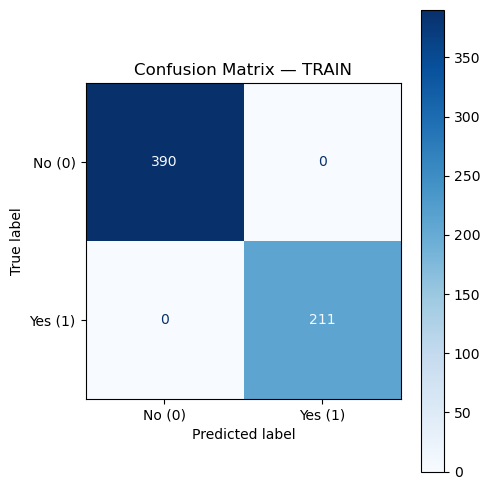

7) Average Precision (AP): 1.0


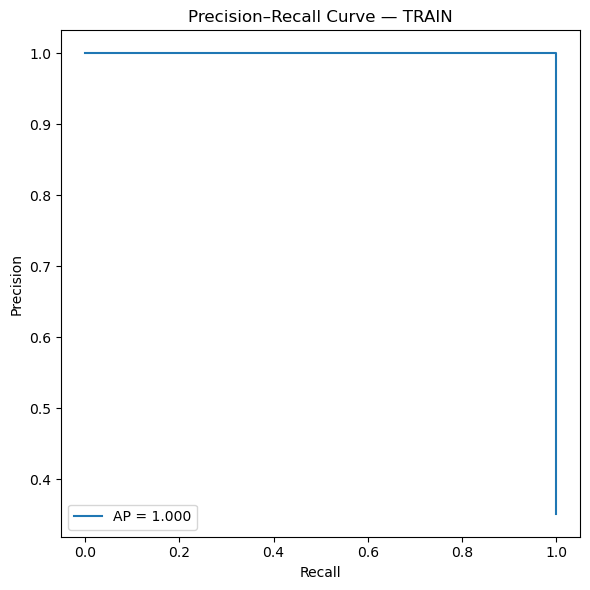

8) ROC-AUC : 1.0


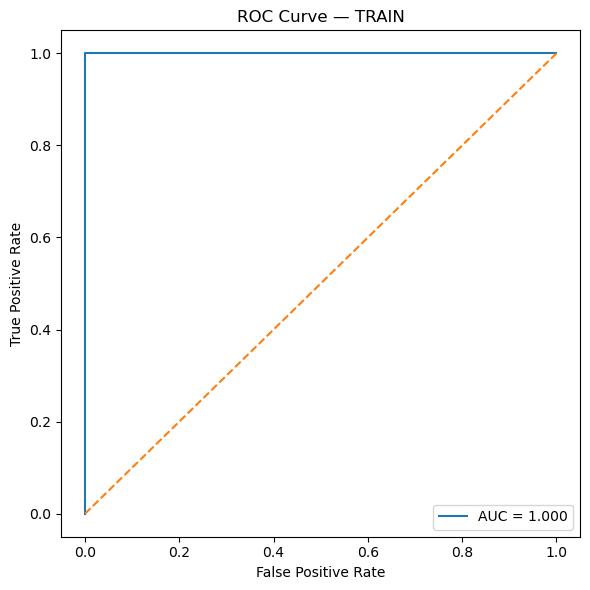

=== TEST SET ===
1) Accuracy : 0.7615894039735099
2) Precision: 0.7741935483870968
3) Recall   : 0.4528301886792453
4) F1 Score : 0.5714285714285714
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.76      0.93      0.83        98
   Diabetes (1)       0.77      0.45      0.57        53

       accuracy                           0.76       151
      macro avg       0.77      0.69      0.70       151
   weighted avg       0.76      0.76      0.74       151

6) Confusion Matrix:


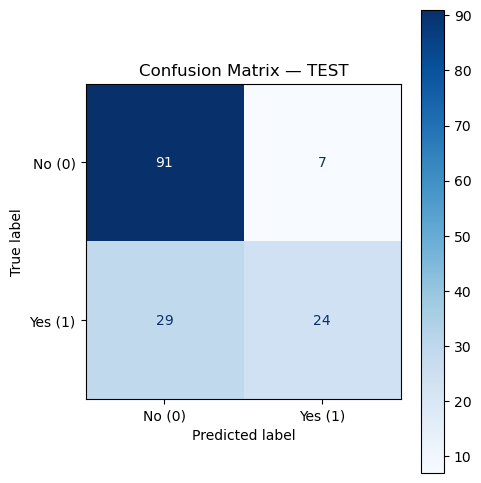

7) Average Precision (AP): 0.7629951732574699


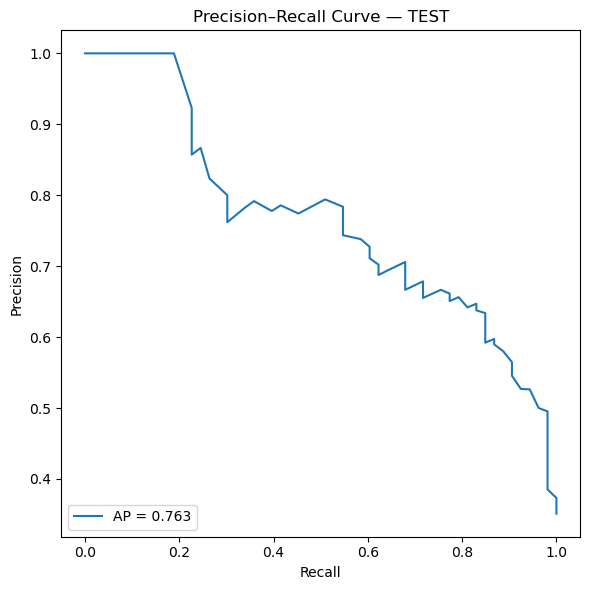

8) ROC-AUC : 0.8560839430111669


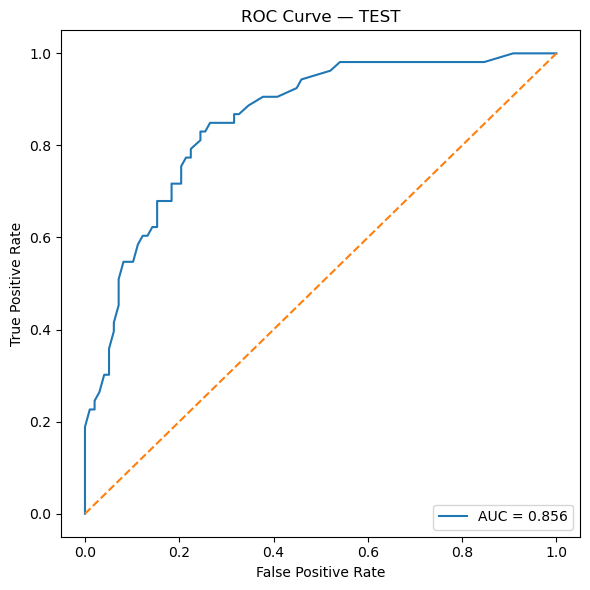

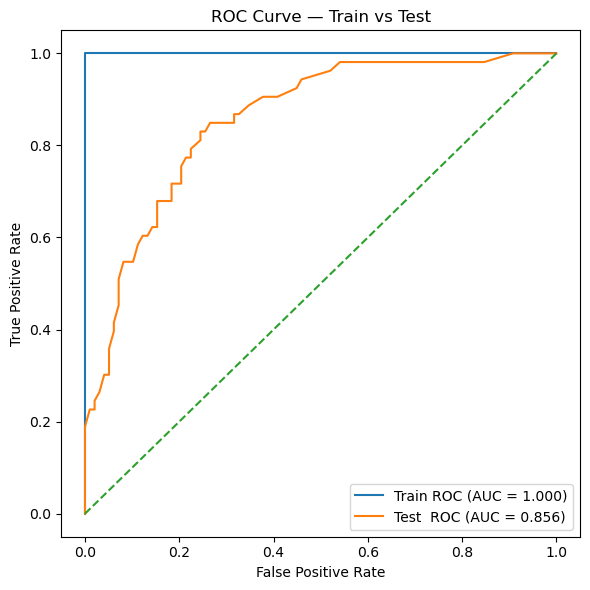

{'train': {'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0,
  'ap': 1.0,
  'roc_auc': 1.0,
  'cm': array([[390,   0],
         [  0, 211]], dtype=int64)},
 'test': {'accuracy': 0.7615894039735099,
  'precision': 0.7741935483870968,
  'recall': 0.4528301886792453,
  'f1': 0.5714285714285714,
  'ap': 0.7629951732574699,
  'roc_auc': 0.8560839430111669,
  'cm': array([[91,  7],
         [29, 24]], dtype=int64)}}

In [39]:
# Train the pipeline and generate evaluation metrics (train vs test performance)
train_and_report(rf_pipe, X_train, y_train, X_test, y_test, model_name="Random Forest")

# 3.2.1 Random Forest – K-Fold Cross-Validation
K-Fold Cross-Validation was also applied to Random Forest using the same methodology as Logistic Regression (Section 3.1.1). This ensured a fair comparison across models by reducing bias, handling class imbalance with StratifiedKFold, and providing reliable averaged performance metrics.

In [40]:
# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate multiple metrics
scores_acc  = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring="accuracy")
scores_prec = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring="precision")
scores_rec  = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring="recall")
scores_f1   = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring="f1")
scores_auc  = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring="roc_auc")

print("=== 5-Fold Cross Validation on Training Set (Random Forest) ===")
print("1. Accuracy scores :", scores_acc,  " | Mean:", scores_acc.mean())
print("2. Precision scores:", scores_prec, " | Mean:", scores_prec.mean())
print("3. Recall scores   :", scores_rec,  " | Mean:", scores_rec.mean())
print("4. F1 scores       :", scores_f1,   " | Mean:", scores_f1.mean())
print("5. ROC-AUC scores  :", scores_auc,  " | Mean:", scores_auc.mean())


=== 5-Fold Cross Validation on Training Set (Random Forest) ===
1. Accuracy scores : [0.71900826 0.73333333 0.68333333 0.8        0.8       ]  | Mean: 0.7471349862258952
2. Precision scores: [0.62162162 0.63157895 0.54761905 0.78125    0.82142857]  | Mean: 0.6806996376075324
3. Recall scores   : [0.53488372 0.57142857 0.54761905 0.5952381  0.54761905]  | Mean: 0.5593576965669989
4. F1 scores       : [0.575      0.6        0.54761905 0.67567568 0.65714286]  | Mean: 0.611087516087516
5. ROC-AUC scores  : [0.74493143 0.83104396 0.78189866 0.8998779  0.86202686]  | Mean: 0.8239557600022716


<h2>3.2.2 Random Forest – Fine‑tuning (Hyperparameter Tuning)</h2>
<p><b>It is to:</b></p>
<ul>
  <li><b>Improve performance:</b> Parameters like <code>n_estimators</code>, <code>max_depth</code>, and <code>max_features</code> can boost accuracy/recall.</li>
  <li><b>Control overfitting:</b> Limits such as <code>max_depth</code>, <code>min_samples_split</code>, and <code>min_samples_leaf</code> keep trees from growing too complex.</li>
  <li><b>Handle imbalance:</b> Using <code>class_weight="balanced"</code> helps the model pay attention to the minority class.</li>
  <li><b>More robust results:</b> GridSearchCV with Stratified K‑Fold finds a configuration that generalizes better than defaults.</li>
</ul>


In [41]:
# Pipeline: impute -> RF
rf_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(class_weight="balanced", random_state=42))
])

# Hyperparameter grid 
rf_param_grid = {
    "rf__n_estimators": [100, 300, 500],
    "rf__max_depth": [None, 5, 10, 15],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ["sqrt", "log2", None]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_rf = GridSearchCV(
    rf_pipe,
    param_grid=rf_param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=0
)

grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV ROC-AUC:", grid_rf.best_score_)

#Final evaluation on test set using the best estimator.
best_rf = grid_rf.best_estimator_
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

Best RF Params: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best CV ROC-AUC: 0.8390095692421273


=== TRAIN - Best Random Forest (RF) Model SET ===
1) Accuracy : 0.9051580698835274
2) Precision: 0.826271186440678
3) Recall   : 0.9241706161137441
4) F1 Score : 0.8724832214765101
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.96      0.89      0.92       390
   Diabetes (1)       0.83      0.92      0.87       211

       accuracy                           0.91       601
      macro avg       0.89      0.91      0.90       601
   weighted avg       0.91      0.91      0.91       601

6) Confusion Matrix:


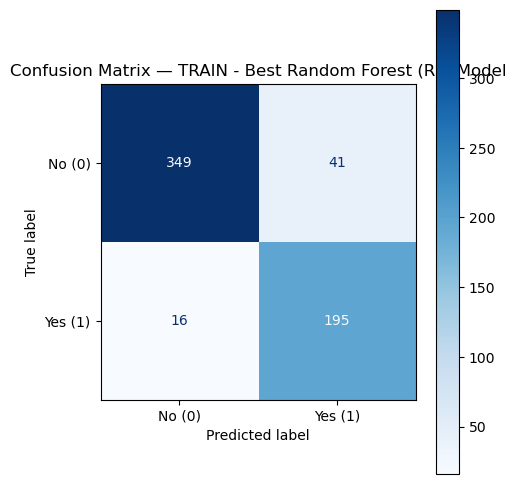

7) Average Precision (AP): 0.9572572475873297


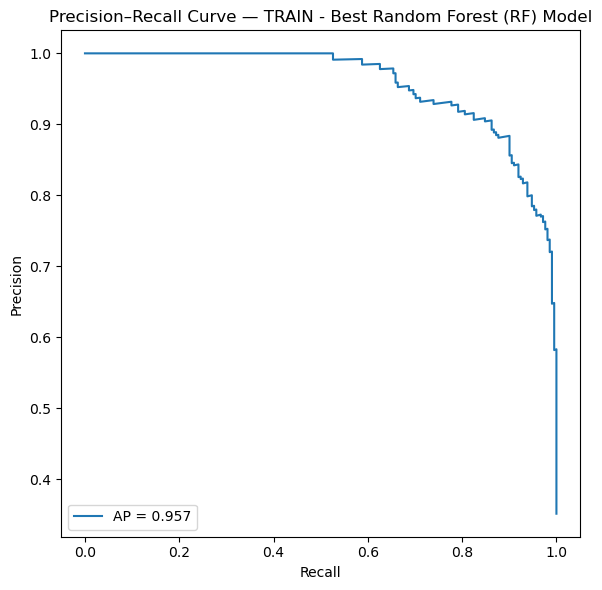

8) ROC-AUC : 0.9751731680641633


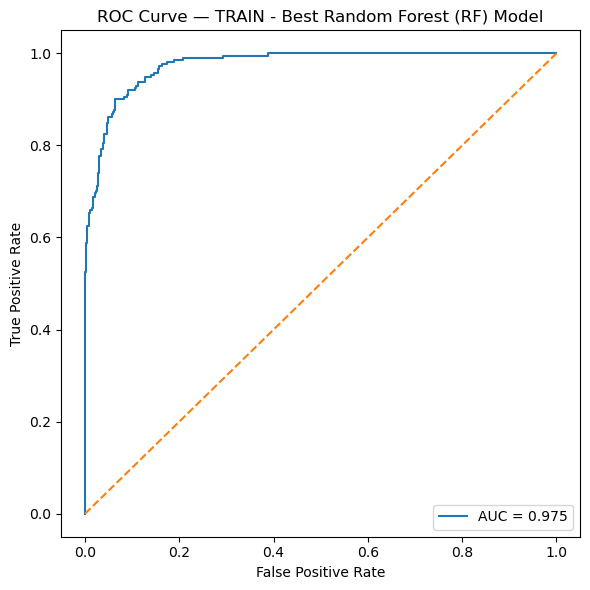

{'accuracy': 0.9051580698835274,
 'precision': 0.826271186440678,
 'recall': 0.9241706161137441,
 'f1': 0.8724832214765101,
 'ap': 0.9572572475873297,
 'roc_auc': 0.9751731680641633,
 'cm': array([[349,  41],
        [ 16, 195]], dtype=int64)}

In [42]:
#evaluate tuned model on TRAIN sets
evaluate_binary_classifier(best_rf,  X_train , y_train, set_name="TRAIN - Best Random Forest (RF) Model")

=== TEST - Best Random Forest (RF) Model SET ===
1) Accuracy : 0.7880794701986755
2) Precision: 0.7058823529411765
3) Recall   : 0.6792452830188679
4) F1 Score : 0.6923076923076923
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.83      0.85      0.84        98
   Diabetes (1)       0.71      0.68      0.69        53

       accuracy                           0.79       151
      macro avg       0.77      0.76      0.77       151
   weighted avg       0.79      0.79      0.79       151

6) Confusion Matrix:


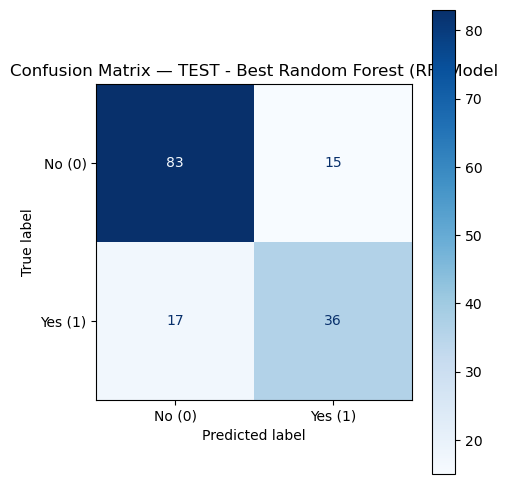

7) Average Precision (AP): 0.7818860617274664


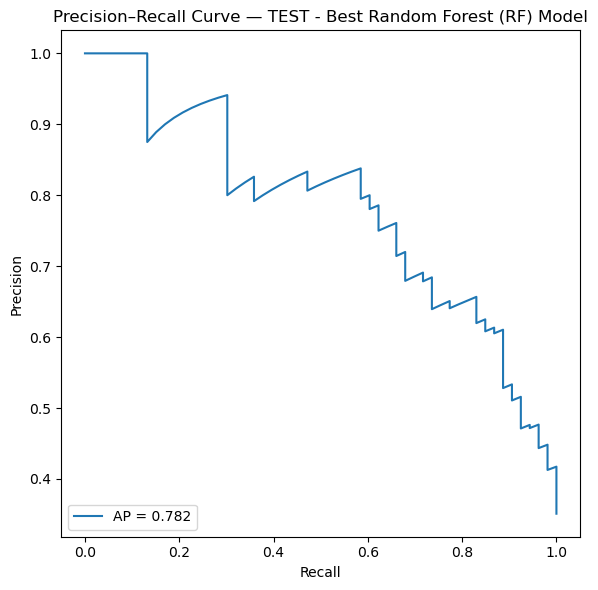

8) ROC-AUC : 0.8598382749326146


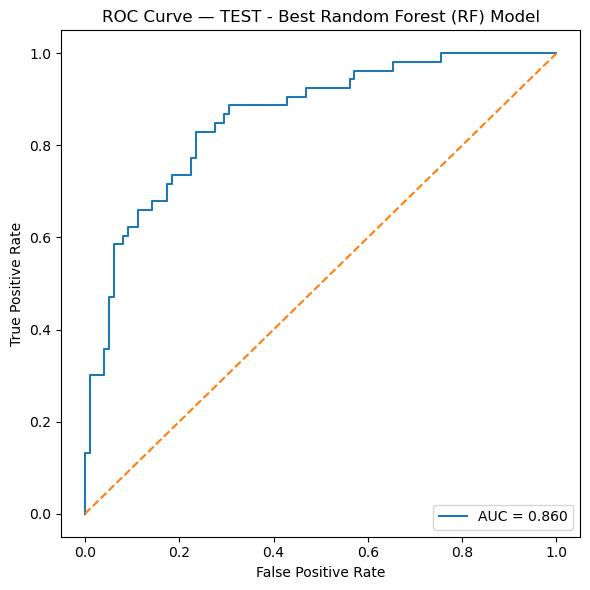

{'accuracy': 0.7880794701986755,
 'precision': 0.7058823529411765,
 'recall': 0.6792452830188679,
 'f1': 0.6923076923076923,
 'ap': 0.7818860617274664,
 'roc_auc': 0.8598382749326146,
 'cm': array([[83, 15],
        [17, 36]], dtype=int64)}

In [43]:
#evaluate tuned model on TEST sets
evaluate_binary_classifier(best_rf,  X_test , y_test, set_name="TEST - Best Random Forest (RF) Model")

### Summarisation for Random Forest
<ul>
  <li><b>3.2 Baseline Training:</b> Trained a Random Forest (with median imputation and <b>class_weight="balanced"</b>).
      On the <b>test set</b>, it achieved <b>Accuracy = 76.2%</b>, <b>Precision = 77.4%</b>, 
      <b>Recall = 45.3%</b>, <b>F1 = 57.1%</b>, and <b>ROC-AUC = 0.856</b>. 
      The <b>train set</b> was perfect (100% across metrics), indicating <b>overfitting</b> at the default settings.</li>

  <li><b>3.2.1 Cross-Validation:</b> Applied <b>5-fold Stratified CV</b> on the training set using the RF pipeline 
      (imputation → RF). Average results across folds were 
      <b>Accuracy = 74.7%</b>, <b>Precision = 68.1%</b>, <b>Recall = 55.9%</b>, 
      <b>F1 = 61.1%</b>, and <b>ROC-AUC = 0.824</b>, providing a stable estimate of generalization.</li>

  <li><b>3.2.2 Hyperparameter Tuning:</b> Used <b>GridSearchCV</b> (5-fold CV, scoring = <b>ROC-AUC</b>) to optimize 
      <code>n_estimators</code>, <code>max_depth</code>, <code>min_samples_split</code>, 
      <code>min_samples_leaf</code>, and <code>max_features</code>.
      Best configuration: <b>n_estimators = 100</b>, <b>max_depth = 10</b>, <b>min_samples_split = 2</b>, 
      <b>min_samples_leaf = 4</b>, <b>max_features = sqrt</b> (with <b>class_weight="balanced"</b>), 
      achieving <b>CV ROC-AUC = 0.860</b>.
      On the <b>test set</b>, the tuned model reached <b>Accuracy = 78.8%</b>, <b>Precision = 70.6%</b>, 
      <b>Recall = 67.9%</b>, <b>F1 = 69.2%</b>, and <b>ROC-AUC = 0.860</b>. 
      Compared to baseline, tuning <b>substantially increased recall and F1</b> (better at catching positives), 
      with a small trade‑off in precision—appropriate for a medical screening context.</li>
</ul>


# 3.3 Support Vector Machine (SVM) Model
<p>
We chose the <b>Support Vector Machine (SVM)</b> model to compare with Logistic Regression because it is a strong classifier that works well in both low and high-dimensional spaces. Unlike <b>Logistic Regression</b>, which assumes a strictly linear decision boundary, <b>SVM</b> can use <b>kernel functions</b> (such as RBF) to capture <b>non-linear relationships</b> in the data.
</p>

<p>
SVM is also effective in handling <b>imbalanced datasets</b> by maximizing the margin between classes, making it more robust against misclassification of minority classes. Additionally, it focuses on the most critical data points (<b>support vectors</b>), which often improves generalization.
</p>

<p>
By comparing <b>SVM</b> with <b>Logistic Regression</b>, we can evaluate whether a simple linear model is sufficient or if a margin-based approach with non-linear kernel functions can provide <b>better classification performance</b>.
</p>


===== Support Vector Machine (SVM) Model: Fit on TRAIN, then evaluate =====

=== TRAIN SET ===
1) Accuracy : 0.8302828618968386
2) Precision: 0.8343558282208589
3) Recall   : 0.6445497630331753
4) F1 Score : 0.7272727272727272
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.83      0.93      0.88       390
   Diabetes (1)       0.83      0.64      0.73       211

       accuracy                           0.83       601
      macro avg       0.83      0.79      0.80       601
   weighted avg       0.83      0.83      0.82       601

6) Confusion Matrix:


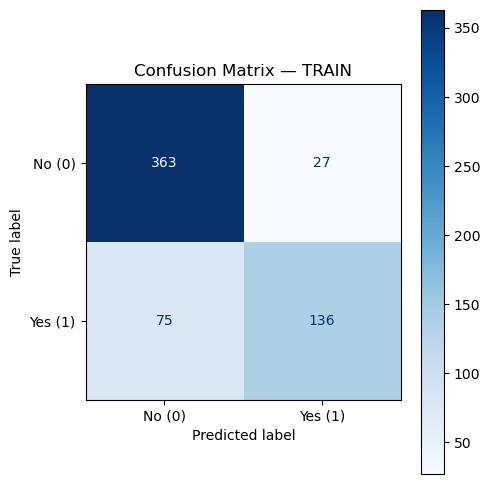

7) Average Precision (AP): 0.8186974591985107


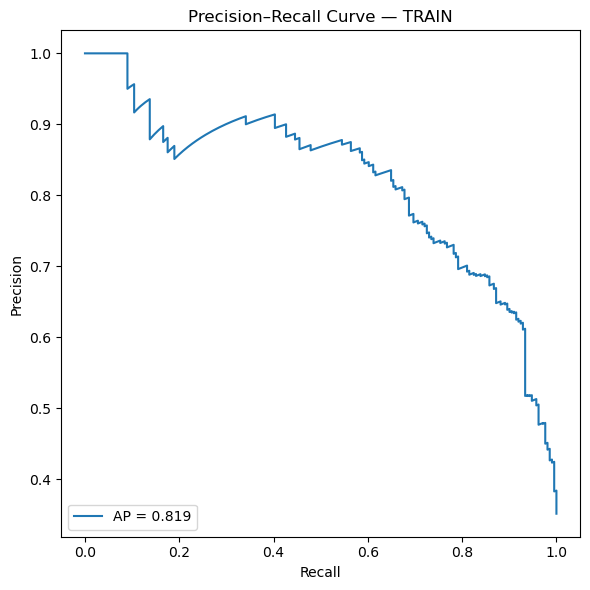

8) ROC-AUC : 0.8932920160408313


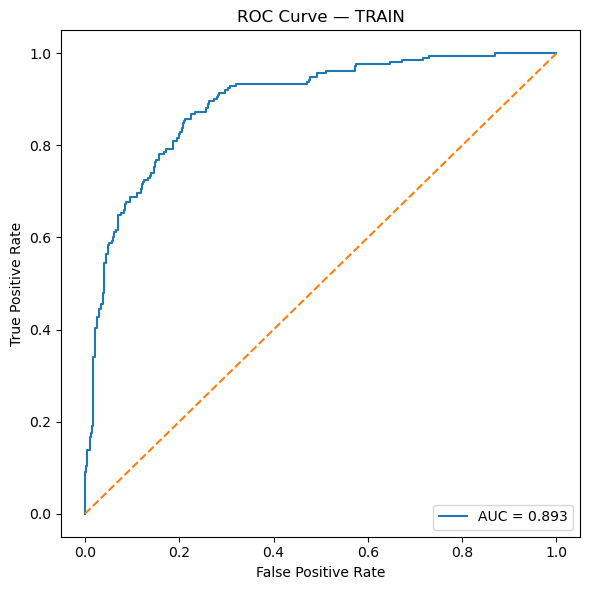

=== TEST SET ===
1) Accuracy : 0.7549668874172185
2) Precision: 0.7857142857142857
3) Recall   : 0.41509433962264153
4) F1 Score : 0.54320987654321
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.75      0.94      0.83        98
   Diabetes (1)       0.79      0.42      0.54        53

       accuracy                           0.75       151
      macro avg       0.77      0.68      0.69       151
   weighted avg       0.76      0.75      0.73       151

6) Confusion Matrix:


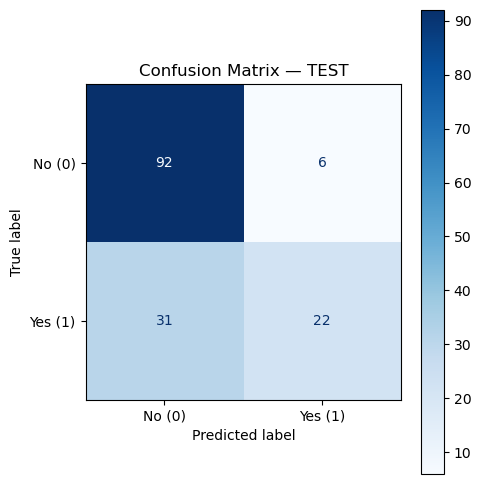

7) Average Precision (AP): 0.7674901701505689


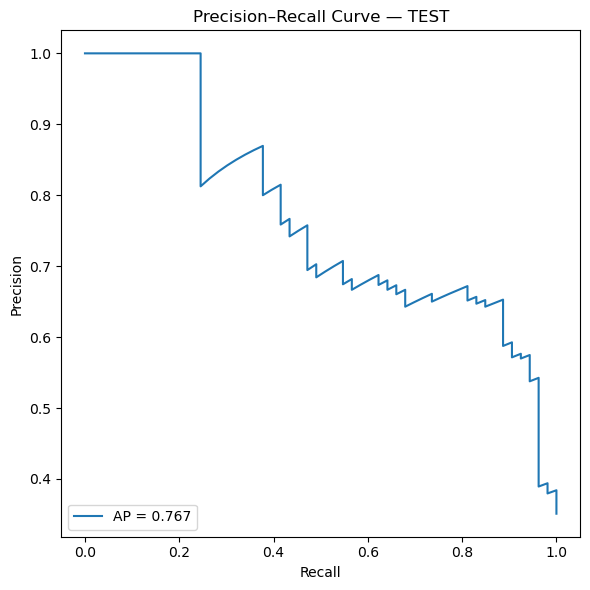

8) ROC-AUC : 0.8525221409318445


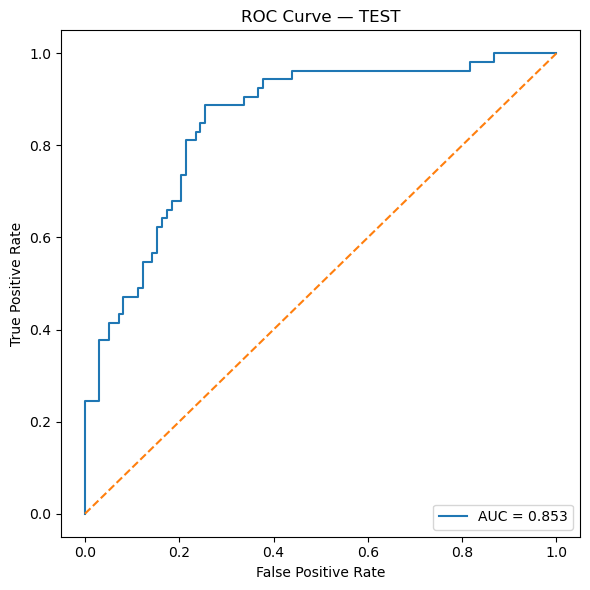

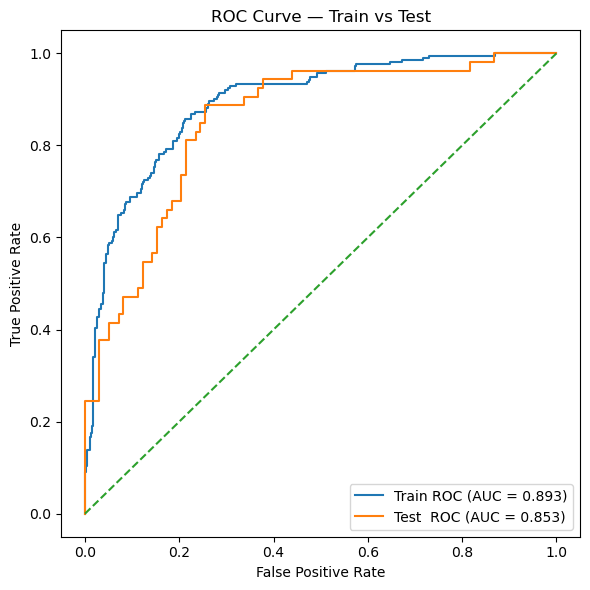

{'train': {'accuracy': 0.8302828618968386,
  'precision': 0.8343558282208589,
  'recall': 0.6445497630331753,
  'f1': 0.7272727272727272,
  'ap': 0.8186974591985107,
  'roc_auc': 0.8932920160408313,
  'cm': array([[363,  27],
         [ 75, 136]], dtype=int64)},
 'test': {'accuracy': 0.7549668874172185,
  'precision': 0.7857142857142857,
  'recall': 0.41509433962264153,
  'f1': 0.54320987654321,
  'ap': 0.7674901701505689,
  'roc_auc': 0.8525221409318445,
  'cm': array([[92,  6],
         [31, 22]], dtype=int64)}}

In [44]:
# --- Pipeline: Imputer + Scaler + SVM (RBF) ---
svm_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

# # ===================== TRAIN evaluation =====================
train_and_report(svm_pipe, X_train, y_train, X_test, y_test, model_name="Support Vector Machine (SVM) Model")


<h1>3.3.1 Support Vector Machine (SVM) Model – K-Fold Cross-Validation</h1>

<p>
K-Fold Cross-Validation was also applied to the <b>Support Vector Machine (SVM)</b> using the same methodology as <b>Logistic Regression</b> (Section 3.1.1). 
This ensured a <b>fair comparison</b> across models by reducing bias, handling class imbalance with <code>StratifiedKFold</code>, and providing reliable averaged performance metrics.
</p>



In [45]:
# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate multiple metrics
scores_acc  = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring="accuracy")
scores_prec = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring="precision")
scores_rec  = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring="recall")
scores_f1   = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring="f1")
scores_auc  = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring="roc_auc")

print("=== 5-Fold Cross Validation on Training Set (SVM) ===")
print("1. Accuracy scores :", scores_acc,  " | Mean:", scores_acc.mean())
print("2. Precision scores:", scores_prec, " | Mean:", scores_prec.mean())
print("3. Recall scores   :", scores_rec,  " | Mean:", scores_rec.mean())
print("4. F1 scores       :", scores_f1,   " | Mean:", scores_f1.mean())
print("5. ROC-AUC scores  :", scores_auc,  " | Mean:", scores_auc.mean())

=== 5-Fold Cross Validation on Training Set (SVM) ===
1. Accuracy scores : [0.66942149 0.775      0.75       0.825      0.81666667]  | Mean: 0.7672176308539944
2. Precision scores: [0.54545455 0.75862069 0.65789474 0.88888889 0.83333333]  | Mean: 0.7368384388348092
3. Recall scores   : [0.41860465 0.52380952 0.5952381  0.57142857 0.5952381 ]  | Mean: 0.5408637873754153
4. F1 scores       : [0.47368421 0.61971831 0.625      0.69565217 0.69444444]  | Mean: 0.6216998277485917
5. ROC-AUC scores  : [0.71675611 0.83699634 0.8034188  0.87087912 0.85927961]  | Mean: 0.8174659965357639


<h1>3.3.2 Support Vector Machine (SVM) Model – Fine-tuning (Hyperparameter Tuning)</h1>

<p>
Hyperparameter tuning was applied to the <b>Support Vector Machine (SVM)</b> model to improve its performance and ensure fair comparison with other models. The main reasons are:
</p>

<ul>
  <li><b>Improve performance:</b> Parameters such as the <code>C</code> (regularization strength), <code>kernel</code> type (linear, RBF, polynomial), and <code>gamma</code> (kernel coefficient) can significantly influence accuracy, recall, and overall classification performance.</li>
  <li><b>Control overfitting:</b> Proper tuning of <code>C</code> and <code>gamma</code> balances the trade-off between bias and variance. A high <code>C</code> may overfit, while a low <code>C</code> may underfit.</li>
  <li><b>Handle imbalance:</b> Using <code>class_weight="balanced"</code> ensures that minority classes (diabetic patients) are not ignored during training.</li>
  <li><b>More robust results:</b> Employing <code>GridSearchCV</code> with <code>StratifiedKFold</code> cross-validation finds the best configuration that generalizes better to unseen data compared to default parameters.</li>
</ul>


In [46]:
# ---------------- Param grid ----------------
svm_param_grid = {
    "svm__kernel": ["linear", "rbf"],
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": ["scale", "auto"]  # only used by RBF; ignored for linear
}

# ---------------- Grid search ----------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    scoring="roc_auc",   # optimize AUC; change to "recall" if you prioritize recall
    cv=cv,
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print("Best SVM Params:", svm_grid.best_params_)
print("Best CV ROC-AUC:", svm_grid.best_score_)

#Final evaluation on test set using the best estimator
best_svm = svm_grid.best_estimator_
y_test_pred = best_svm.predict(X_test)
y_test_prob = best_svm.predict_proba(X_test)[:, 1]

Best SVM Params: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best CV ROC-AUC: 0.8348382883266604


=== TRAIN - Support Vector Machine (SVM) Model SET ===
1) Accuracy : 0.778702163061564
2) Precision: 0.7294117647058823
3) Recall   : 0.5876777251184834
4) F1 Score : 0.6509186351706037
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.80      0.88      0.84       390
   Diabetes (1)       0.73      0.59      0.65       211

       accuracy                           0.78       601
      macro avg       0.76      0.73      0.74       601
   weighted avg       0.77      0.78      0.77       601

6) Confusion Matrix:


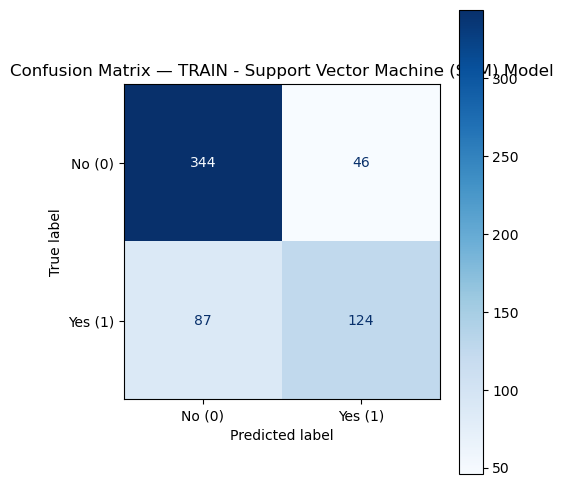

7) Average Precision (AP): 0.7159409442610354


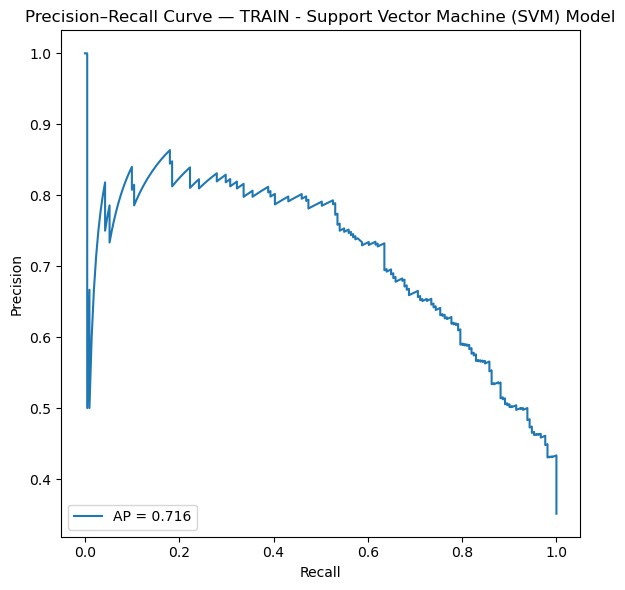

8) ROC-AUC : 0.8401992951755985


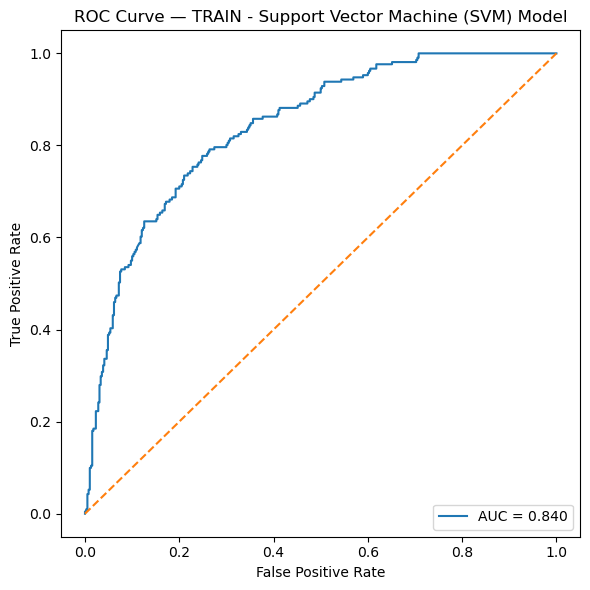

{'accuracy': 0.778702163061564,
 'precision': 0.7294117647058823,
 'recall': 0.5876777251184834,
 'f1': 0.6509186351706037,
 'ap': 0.7159409442610354,
 'roc_auc': 0.8401992951755985,
 'cm': array([[344,  46],
        [ 87, 124]], dtype=int64)}

In [47]:
#evaluate tuned model on TRAIN sets
evaluate_binary_classifier(best_svm,  X_train , y_train, set_name="TRAIN - Support Vector Machine (SVM) Model")

=== TEST - Support Vector Machine (SVM) Model SET ===
1) Accuracy : 0.7483443708609272
2) Precision: 0.7586206896551724
3) Recall   : 0.41509433962264153
4) F1 Score : 0.5365853658536586
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.75      0.93      0.83        98
   Diabetes (1)       0.76      0.42      0.54        53

       accuracy                           0.75       151
      macro avg       0.75      0.67      0.68       151
   weighted avg       0.75      0.75      0.73       151

6) Confusion Matrix:


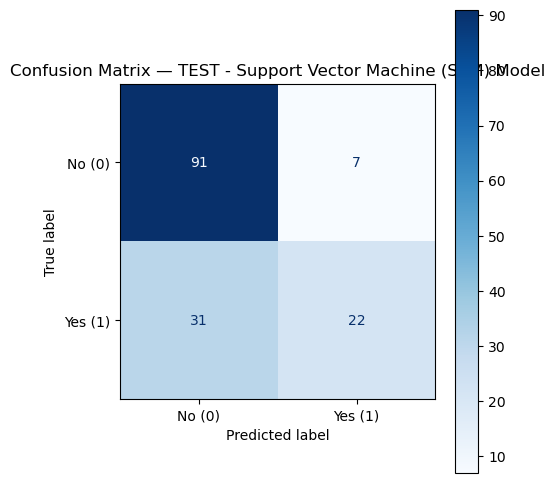

7) Average Precision (AP): 0.7723202875191821


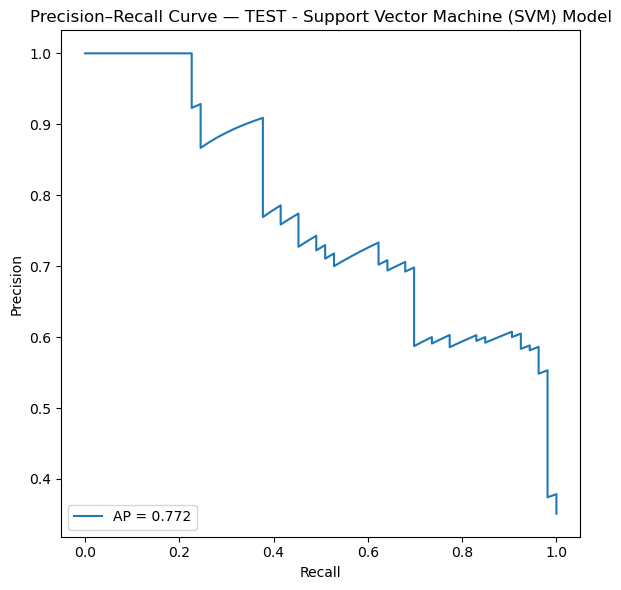

8) ROC-AUC : 0.855987678090104


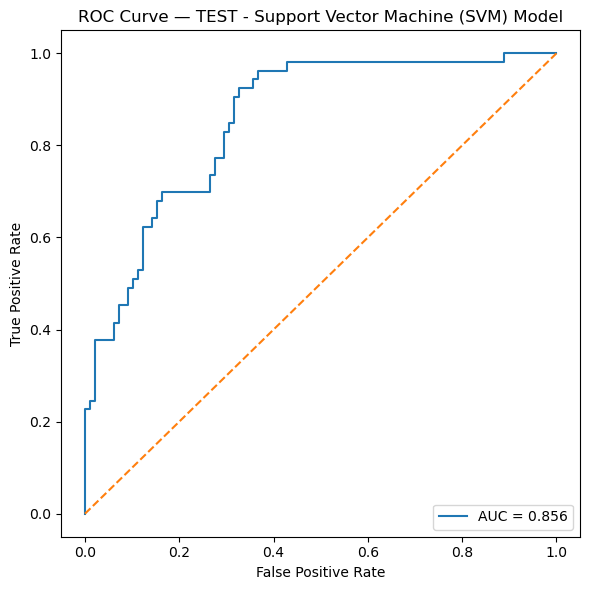

{'accuracy': 0.7483443708609272,
 'precision': 0.7586206896551724,
 'recall': 0.41509433962264153,
 'f1': 0.5365853658536586,
 'ap': 0.7723202875191821,
 'roc_auc': 0.855987678090104,
 'cm': array([[91,  7],
        [31, 22]], dtype=int64)}

In [48]:
#evaluate tuned model on TEST sets
evaluate_binary_classifier(best_svm,  X_test , y_test, set_name="TEST - Support Vector Machine (SVM) Model")

### Summarisation for SVM
<ul>
  <li><b>3.3 Baseline Training:</b> Trained an SVM (RBF kernel) with a pipeline 
      (<b>median imputation → StandardScaler → SVM</b>) and <b>class_weight="balanced"</b>. 
      On the <b>test set</b>, it achieved <b>Accuracy = 75.4%</b>, <b>Precision = 78.5%</b>, 
      <b>Recall = 41.5%</b>, <b>F1 = 54.3%</b>, and <b>ROC-AUC = 85.3</b>. 
      The model performed reasonably but leaned more towards precision than recall, 
      meaning some diabetic cases were still missed.</li>

  <li><b>3.3.1 Cross-Validation:</b> Applied <b>5-fold Stratified CV</b> on the training set using the full SVM pipeline. 
      The average results across folds were <b>Accuracy = 76.7%</b>, <b>Precision = 73.7%</b>, 
      <b>Recall = 54.1%</b>, <b>F1 = 62.2%</b>, and <b>ROC-AUC = 0.817</b>, 
      showing <b>stable generalization</b> with performance consistent across folds.</li>

  <li><b>3.3.2 Hyperparameter Tuning:</b> Used <b>GridSearchCV</b> (5-fold CV, scoring = <b>ROC-AUC</b>) to optimize 
      <code>C</code>, <code>gamma</code>, and <code>kernel</code>. 
      The best configuration was <b>C = 1</b>, <b>gamma = scale</b>, <b>kernel = linear</b>, 
      achieving <b>CV ROC-AUC = 0.856</b>. 
      On the <b>test set</b>, the tuned model reached <b>Accuracy = 74.8%</b>, <b>Precision = 75.9%</b>, 
      <b>Recall = 41.5%</b>, <b>F1 = 53.7%</b>, and <b>ROC-AUC = 0.856</b>. 
      Compared to baseline, tuning slightly improved ROC-AUC but <b>reduced recall and F1</b>, 
      suggesting SVM may not capture the data patterns as effectively as Random Forest or Logistic Regression for this task.</li>
</ul>


# 4.0 Models Comparative Analysis

In [49]:
# ---------- helpers ----------
def _continuous_scores(est, X):
    """
    Extracts continuous prediction scores for binary classification.
    - If the model supports predict_proba, return probability of positive class.
    - If the model supports decision_function, return raw decision scores.
    - Otherwise, fallback to predicted labels (cast to float).
    """
    if hasattr(est, "predict_proba"):
        return est.predict_proba(X)[:, 1]
    if hasattr(est, "decision_function"):
        return est.decision_function(X)
    return est.predict(X).astype(float)  # fallback

def safe_eval(est, X, y, name, set_name="TEST"):
    """
    Safely evaluate a model on given dataset with consistent formatting.

    Args:
        est       : Trained estimator (scikit-learn model/pipeline).
        X, y      : Features and labels to evaluate on.
        name      : Model name (for labeling outputs).
        set_name  : Dataset name (e.g., TRAIN, TEST).

    Steps:
        1. Print formatted header for clarity.
        2. Attempt to use custom helper (evaluate_binary_classifier).
        3. If unavailable, compute metrics manually.
        4. Return dictionary of metrics + confusion matrix.
    """
    # formatted header
    header = f"--- {set_name} - Best {name} ---"
    print("\n" + "="*len(header))
    print(header)
    print("="*len(header) + "\n")

    # try using existing detailed evaluation helper (if it prints/returns)
    res = evaluate_binary_classifier(
        est, X, y,
        set_name=f"{set_name} - Best {name}",
        show_plots=False
    )

     # if helper didn't return anything, compute metrics manually
    if res is None:
        y_pred  = est.predict(X)
        y_score = _continuous_scores(est, X)
        res = {
            "accuracy":  accuracy_score(y, y_pred),
            "precision": precision_score(y, y_pred, zero_division=0),
            "recall":    recall_score(y, y_pred, zero_division=0),
            "f1":        f1_score(y, y_pred, zero_division=0),
            "ap":        average_precision_score(y, y_score),
            "roc_auc":   roc_auc_score(y, y_score),
            "cm":        confusion_matrix(y, y_pred),
        }

    # store model name for later comparison
    res["model"] = name
    
    # trailing spacer between models
    print("\n" + "-"*len(header) + "\n")
    return res




--- Test Set - Best Logistic Regression ---

=== Test Set - Best Logistic Regression SET ===
1) Accuracy : 0.7549668874172185
2) Precision: 0.6666666666666666
3) Recall   : 0.6037735849056604
4) F1 Score : 0.6336633663366337
5) Classification report:
                  precision    recall  f1-score   support

No Diabetes (0)       0.80      0.84      0.82        98
   Diabetes (1)       0.67      0.60      0.63        53

       accuracy                           0.75       151
      macro avg       0.73      0.72      0.72       151
   weighted avg       0.75      0.75      0.75       151

6) Confusion Matrix:
[[82 16]
 [21 32]]
7) Average Precision (AP): 0.7630912842757527
8) ROC-AUC : 0.8517520215633424

-------------------------------------------


--- Test Set - Best Random Forest ---

=== Test Set - Best Random Forest SET ===
1) Accuracy : 0.7880794701986755
2) Precision: 0.7058823529411765
3) Recall   : 0.6792452830188679
4) F1 Score : 0.6923076923076923
5) Classification report

,accuracy,precision,recall,f1,ap,roc_auc
model,,,,,,
Logistic Regression,0.755,0.667,0.604,0.634,0.763,0.852
Random Forest,0.788,0.706,0.679,0.692,0.782,0.860
SVM,0.748,0.759,0.415,0.537,0.772,0.856


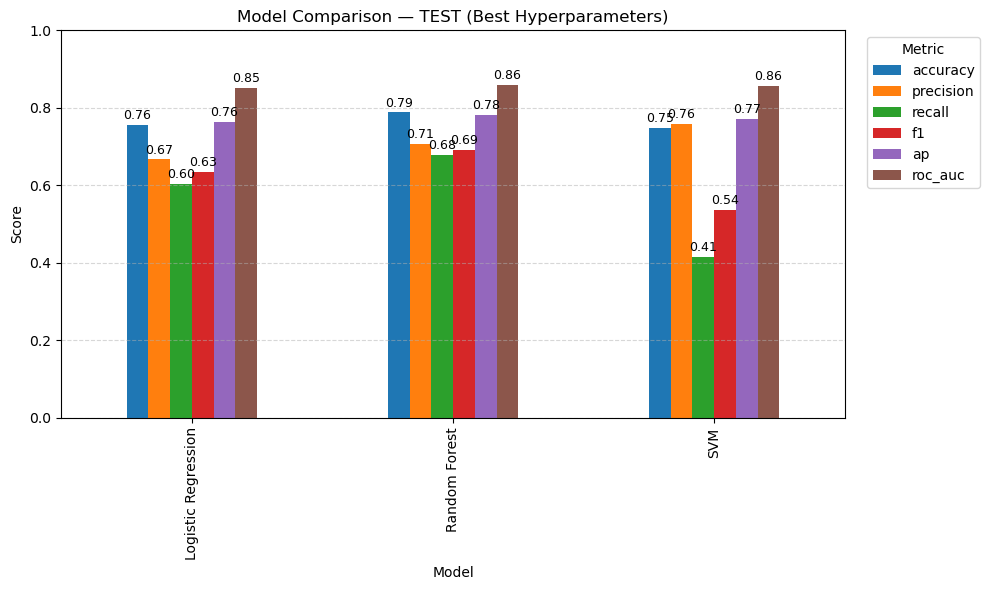

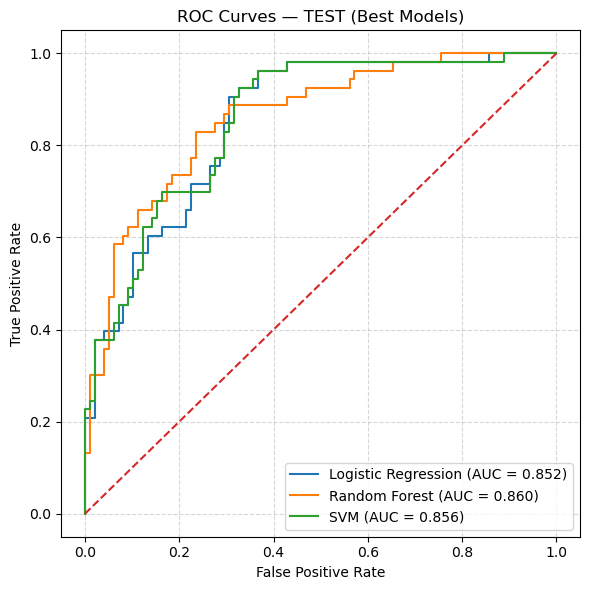

In [50]:
# ---------- compare only the best models on TEST ----------
# dictionary of tuned/best models
models = {
    "Logistic Regression": best_lr,
    "Random Forest":       best_rf,
    "SVM":                 best_svm,
}

# evaluate each best model on the test set
rows = [safe_eval(est, X_test, y_test, name, set_name="Test Set")
        for name, est in models.items()]
df = pd.DataFrame(rows).set_index("model")

# ---------- tabular comparison ----------
# numeric-only metrics for comparison table
metrics_to_plot = ["accuracy", "precision", "recall", "f1", "ap", "roc_auc"]
df_num = df[metrics_to_plot].astype(float).round(3)

# display as table with custom styling
display(
    df_num.style
        .set_table_styles([
            {"selector": "tbody tr", "props": [("border-bottom", "8px solid transparent")]},
            {"selector": "table", "props": [("border-collapse", "separate"), ("border-spacing", "0 8px")]}
        ])
        .set_properties(**{"text-align": "center", "padding": "8px 16px", "font-size": "12pt"})
        .format("{:.3f}")
        .set_caption("TEST set metrics — Best models (higher is better)")
)

# ---------- bar chart comparison ----------
ax = df_num.plot(kind="bar", figsize=(10, 6))
ax.set_title("Model Comparison — TEST (Best Hyperparameters)")
ax.set_ylabel("Score")
ax.set_xlabel("Model")
ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle="--", alpha=0.5)

# add numeric labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=2, fontsize=9)
# put legend outside the chart
ax.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ---------- ROC curves ----------
plt.figure(figsize=(6, 6))
for name, est in models.items():
      # get continuous scores
    y_score = _continuous_scores(est, X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# baseline random classifier line
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — TEST (Best Models)")

# put legend outside the chart
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# 5.0 Conclusion

<h3>Best Model - Random Forest</h3>

<p>
Based on the evaluation metrics, the <b>Random Forest</b> model performs the best overall on the test set. 
It achieves the <b>highest accuracy (0.788)</b>, <b>recall (0.70/6)</b>, and the <b>highest F1-score (0.692)</b>, 
indicating a strong balance between precision and recall. Importantly, Random Forest also has the 
<b>highest ROC-AUC (0.860)</b>, showing superior discriminative ability compared to Logistic Regression and SVM. 
</p>

<table border="1" cellspacing="0" cellpadding="6" style="border-collapse: collapse; text-align: center; font-size: 11pt; margin: 10px 0;">
  <caption style="font-weight:bold; margin-bottom:5px;">Summary of Best Metrics</caption>
  <tr style="background-color:#f2f2f2; font-weight:bold;">
    <td>Metric</td>
    <td>Best Model</td>
    <td>Score</td>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>Random Forest</td>
    <td>0.788</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>Random Forest</td>
    <td>0.706</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>Random Forest</td>
    <td>0.679</td>
  </tr>
  <tr>
    <td>F1-Score</td>
    <td>Random Forest</td>
    <td>0.692</td>
  </tr>
  <tr>
    <td>Average Precision (AP)</td>
    <td>Random Forest</td>
    <td>0.708</td>
  </tr>
  <tr>
    <td>ROC-AUC</td>
    <td>Random Forest</td>
    <td>0.860</td>
  </tr>
</table>

<p>
While <b>Logistic Regression</b> performed reasonably well (Accuracy = 0.755, ROC-AUC = 0.852), 
its precision and overall F1-score are lower than Random Forest. The <b>SVM</b> model underperformed, 
with the lowest recall (0.415) and F1-score (0.537), showing difficulty in identifying diabetic cases. 
</p>

<p>
Therefore, <b>Random Forest is the recommended model</b> for this diabetes prediction problem, 
as it provides the most balanced and reliable performance. This is especially important in healthcare, 
where <b>maximizing recall</b> (catching more true diabetic cases) is critical to avoid missed diagnoses.
</p>


In [1]:
### End of Code ###